# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

# 2. General Inspection

In [2]:
df = pd.read_csv("Data/students_data.csv")
df.head()

StudentID  Age  Gender         Ethnicity ParentalEducation  \
0       1001   17  Female  African American        Bachelor’s   
1       1002   18  Female             Asian      No Education   
2       1003   15  Female         Caucasian       High School   
3       1004   17  Female         Caucasian        Bachelor’s   
4       1005   17    Male  African American      Some College   

   StudyTimeWeekly  Absences Tutoring ParentalSupport Extracurricular Sports  \
0               16        13       No        Moderate              No     No   
1               17        28       No        Moderate             Yes    Yes   
2               13        18      Yes       Very High              No     No   
3                6         4       No            High             Yes     No   
4                6        20       No       Very High              No     No   

  Music Volunteering       GPA GradeClass  
0    No           No  3.158425          B  
1   Yes           No  2.794655          C  
2    No          Yes  3.774847          A  
3    No           No  3.040574          B  
4    No           No  3.382310          B

In [3]:
df.shape

(3842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          3842 non-null   int64  
 1   Age                3842 non-null   int64  
 2   Gender             3842 non-null   object 
 3   Ethnicity          3842 non-null   object 
 4   ParentalEducation  3842 non-null   object 
 5   StudyTimeWeekly    3842 non-null   int64  
 6   Absences           3842 non-null   int64  
 7   Tutoring           3842 non-null   object 
 8   ParentalSupport    3842 non-null   object 
 9   Extracurricular    3842 non-null   object 
 10  Sports             3842 non-null   object 
 11  Music              3842 non-null   object 
 12  Volunteering       3842 non-null   object 
 13  GPA                3842 non-null   float64
 14  GradeClass         3842 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 450.4+ KB


In [5]:
df.describe()

StudentID          Age  StudyTimeWeekly     Absences          GPA
count  3842.000000  3842.000000      3842.000000  3842.000000  3842.000000
mean   3485.216294    16.490890         9.290213    16.029412     3.139578
std    1443.422983     1.127187         5.901593     8.782418     0.519259
min    1001.000000    15.000000         0.000000     0.000000     2.000244
25%    2238.250000    15.000000         4.000000     9.000000     2.735514
50%    3477.500000    16.000000         9.000000    16.000000     3.179116
75%    4733.750000    18.000000        14.000000    24.000000     3.574925
max    5997.000000    18.000000        20.000000    30.000000     3.999981

In [6]:
df.nunique()

StudentID            3842
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly        21
Absences               31
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  3842
GradeClass              4
dtype: int64

In [7]:
for col in df.columns:
    unique_vals = df[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}': {n_unique} unique values")

    # If small enough, print all
    if n_unique <= 20:
        print("Values:", unique_vals)
    else:
        print("Sample values:", unique_vals[:10], "...", unique_vals[-10:])  # show first 10 only

    print("-" * 50)


Column 'StudentID': 3842 unique values
Sample values: [1001 1002 1003 1004 1005 1007 1009 1010 1011 1013] ... [5986 5987 5988 5990 5991 5992 5993 5994 5995 5997]
--------------------------------------------------
Column 'Age': 4 unique values
Values: [17 18 15 16]
--------------------------------------------------
Column 'Gender': 2 unique values
Values: ['Female' 'Male']
--------------------------------------------------
Column 'Ethnicity': 4 unique values
Values: ['African American' 'Asian' 'Caucasian' 'Other']
--------------------------------------------------
Column 'ParentalEducation': 5 unique values
Values: ['Bachelor’s' 'No Education' 'High School' 'Some College' 'Higher']
--------------------------------------------------
Column 'StudyTimeWeekly': 21 unique values
Sample values: [16 17 13  6 14 11  7 15  1  4] ... [20 10 12  2  3  8  0  5  9 18]
--------------------------------------------------
Column 'Absences': 31 unique values
Sample values: [13 28 18  4 20 25 23 11 15 14]

# 3. Data Cleaning

### 3.1 Dropping irrelavent columns

In [8]:
df.drop("StudentID", axis=1, inplace=True)

### 3.2 Handeling Missing values

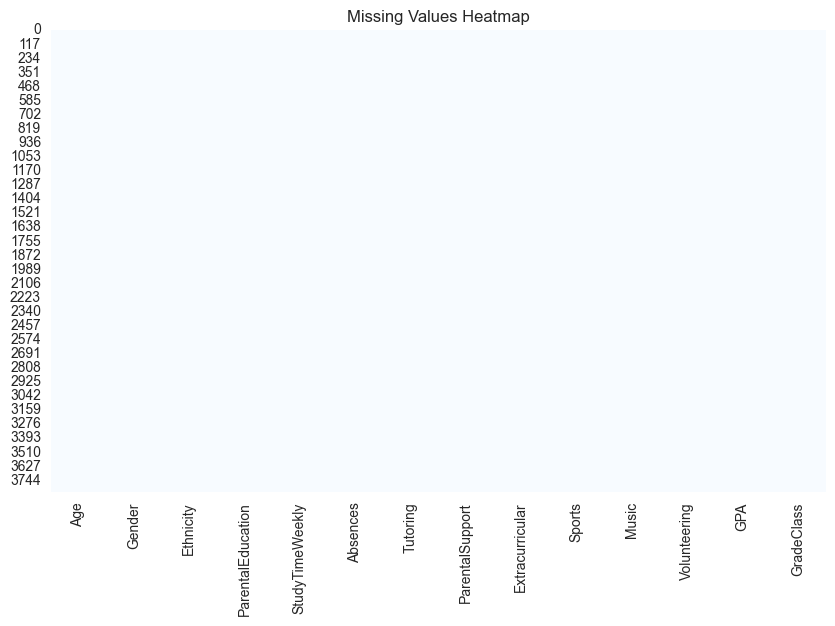

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [11]:
missing_ratio = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_ratio)

Missing Values Percentage:
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64


### 3.3 Renaming Column properly

In [12]:
df = df.rename(
    columns={
        "ParentalEducation": "Parental_Education",
        "StudyTimeWeekly": "Weekly_Study_Time",
        "ParentalSupport": "Parental_Support",
        "Extracurricular": "Extracurricular_Activity",
        "GradeClass": "Grade_Class"
    }
)

In [13]:
cat_cols=["Gender", "Ethnicity", "Parental_Education", "Tutoring", "Parental_Support", "Extracurricular_Activity", "Sports", "Music", "Volunteering", "Grade_Class"]
num_cols = ["Age", "Weekly_Study_Time", "Absences"]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3842 non-null   int64  
 1   Gender                    3842 non-null   object 
 2   Ethnicity                 3842 non-null   object 
 3   Parental_Education        3842 non-null   object 
 4   Weekly_Study_Time         3842 non-null   int64  
 5   Absences                  3842 non-null   int64  
 6   Tutoring                  3842 non-null   object 
 7   Parental_Support          3842 non-null   object 
 8   Extracurricular_Activity  3842 non-null   object 
 9   Sports                    3842 non-null   object 
 10  Music                     3842 non-null   object 
 11  Volunteering              3842 non-null   object 
 12  GPA                       3842 non-null   float64
 13  Grade_Class               3842 non-null   object 
dtypes: float

### 3.4 Checking Duplicates

In [15]:
print("sum of detected duplicates before removal: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("sum of detected duplicates after removal: ", df.duplicated().sum())

sum of detected duplicates before removal:  0
sum of detected duplicates after removal:  0


### 3.5 Handeling Outliers

#### 3.5.1 Numerical Outliers

In [16]:
def plot_numerical_box(col, width, length):
    plt.figure(figsize=(width, length))
    sns.boxplot(data=df[col], orient='h')
    plt.title("Outlier Detection with boxplot")
    plt.xlabel(col)
    plt.show()

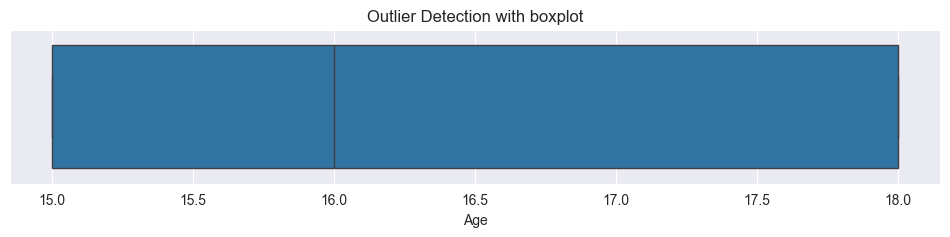

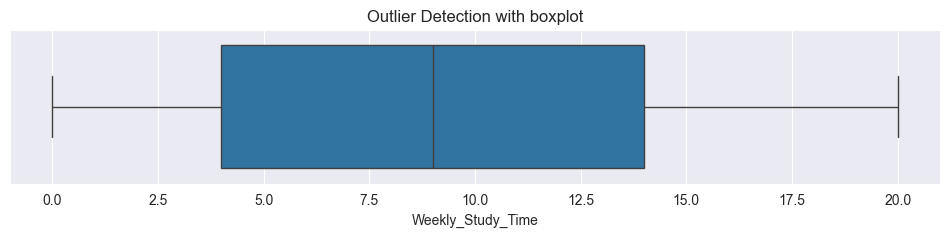

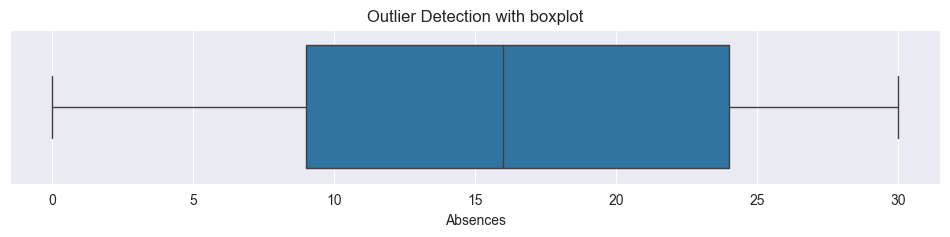

In [17]:
for col in num_cols:
    plot_numerical_box(col, 12, 2)

In [18]:
def detect_outliers_iqr(cols):
    q1 = cols.quantile(0.25)
    q3 = cols.quantile(0.75)
    iqr = q3 - q1
    return (cols < (q1 - 1.5 * iqr)) | (cols > (q3 + 1.5 * iqr)).astype(int)

In [19]:
outlier_mask = detect_outliers_iqr(df[num_cols])
outlier_mask.value_counts()

Age    Weekly_Study_Time  Absences
False  False              False       3842
Name: count, dtype: int64

In [20]:
outlier_counts = outlier_mask.sum(axis=1)
print("Data before cleaning: ", df.shape)
df = df[outlier_counts < 1]
print("Data after cleaning: ", df.shape)

Data before cleaning:  (3842, 14)
Data after cleaning:  (3842, 14)


### 3.5.2 Categorical Outliers

In [21]:
def rare_encoder_with_report(df, column, threshold=0.005):
    total_count = len(df)
    freq = df[column].value_counts(normalize=True)  # proportion
    rare_categories = freq[freq < threshold]

    if not rare_categories.empty:
        print(f"\n[Feature: {column}] Rare categories (< {threshold*100:.1f}%):")
        for cat, perc in rare_categories.items():
            print(f"  - {cat}: {perc*100:.2f}%")
        # Replace them
        df[column] = df[column].replace(rare_categories.index, "Other")
    else:
        print(f"\n[Feature: {column}] contains no rare categories")
    return df

In [22]:
for col in cat_cols:
    df = rare_encoder_with_report(df, col, threshold=0.01)


[Feature: Gender] contains no rare categories

[Feature: Ethnicity] contains no rare categories

[Feature: Parental_Education] contains no rare categories

[Feature: Tutoring] contains no rare categories

[Feature: Parental_Support] contains no rare categories

[Feature: Extracurricular_Activity] contains no rare categories

[Feature: Sports] contains no rare categories

[Feature: Music] contains no rare categories

[Feature: Volunteering] contains no rare categories

[Feature: Grade_Class] contains no rare categories


### 3.6 Rounding GPA (Target) to 2 decimal points

In [23]:
df["GPA"] = df["GPA"].round(2)
df["GPA"].head(10)

0    3.16
1    2.79
2    3.77
3    3.04
4    3.38
5    3.01
6    3.94
7    2.74
8    3.41
9    2.29
Name: GPA, dtype: float64

# 4. Feature Engineering

### 4.1 adding new features  
##### for better correlation with target

#### 4.1.1 Demographic features

##### **IsChind**: underage vs senior

In [24]:
df["Is_Child"] = (df["Age"] < 18).astype(int)

display(df[["Is_Child", "Age", "Grade_Class"]].head())

Is_Child  Age Grade_Class
0         1   17           B
1         0   18           C
2         1   15           A
3         1   17           B
4         1   17           B

### 4.1.2 Study Habits Features

#### **Study_Efficiency**: how efficient student study vs his absences count.

#### **Absence_Rate**: Normalized absence rate per month.

#### **Absence_Rate_Category**: level of absence rate of a student

In [25]:
df["Study_Efficiency"] = df["Weekly_Study_Time"] / df["Absences"].where(df['Absences'] != 0, np.nan)
df['Study_Efficiency'].fillna(0, inplace=True)

df["Absence_Rate"] = df["Absences"] / 30

df["Absence_Rate_Category"] = pd.cut(
    df["Absences"],
    bins=[-1, 10, 20, 30],
    labels=["Low", "Medium", "High"]
)

display(df[["Weekly_Study_Time", "Absences", "Study_Efficiency", "Absence_Rate_Category", "Grade_Class"]].head())

Weekly_Study_Time  Absences  Study_Efficiency Absence_Rate_Category  \
0                 16        13          1.230769                Medium   
1                 17        28          0.607143                  High   
2                 13        18          0.722222                Medium   
3                  6         4          1.500000                   Low   
4                  6        20          0.300000                Medium   

  Grade_Class  
0           B  
1           C  
2           A  
3           B  
4           B

### 4.1.3 Extracurricular Features

#### **Total Activivties:** how active a student is beyond academics.

In [26]:
activity_cols = ["Extracurricular_Activity", "Sports", "Music", "Volunteering"]
df["Total_Activities"] = df[activity_cols].eq("Yes").sum(axis=1)

display(df[["Extracurricular_Activity", "Sports", "Music", "Volunteering", "Total_Activities", "Grade_Class"]].head())

Extracurricular_Activity Sports Music Volunteering  Total_Activities  \
0                       No     No    No           No                 0   
1                      Yes    Yes   Yes           No                 3   
2                       No     No    No          Yes                 1   
3                      Yes     No    No           No                 1   
4                       No     No    No           No                 0   

  Grade_Class  
0           B  
1           C  
2           A  
3           B  
4           B

### 4.1.4 Academic Performance Features

#### **AbsenceImpact:** GPA / Absence

#### **StudyImpact:** GPA / Weekly_study_time

In [27]:
df["Absence_Impact"] = df["GPA"] / df["Absences"].where(df['Absences'] != 0, np.nan)
df['Absence_Impact'].fillna(df["GPA"] /0.01, inplace=True)

df["Study_Impact"] = df["GPA"] * df["Weekly_Study_Time"].where(df['Weekly_Study_Time'] != 0, np.nan)
df['Study_Impact'].fillna(df["GPA"] *0.01, inplace=True)

display(df[["Absence_Impact", "Study_Impact", "GPA", "Absences", "Weekly_Study_Time"]].head())

Absence_Impact  Study_Impact   GPA  Absences  Weekly_Study_Time
0        0.243077         50.56  3.16        13                 16
1        0.099643         47.43  2.79        28                 17
2        0.209444         49.01  3.77        18                 13
3        0.760000         18.24  3.04         4                  6
4        0.169000         20.28  3.38        20                  6

In [28]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       3842 non-null   int64   
 1   Gender                    3842 non-null   object  
 2   Ethnicity                 3842 non-null   object  
 3   Parental_Education        3842 non-null   object  
 4   Weekly_Study_Time         3842 non-null   int64   
 5   Absences                  3842 non-null   int64   
 6   Tutoring                  3842 non-null   object  
 7   Parental_Support          3842 non-null   object  
 8   Extracurricular_Activity  3842 non-null   object  
 9   Sports                    3842 non-null   object  
 10  Music                     3842 non-null   object  
 11  Volunteering              3842 non-null   object  
 12  GPA                       3842 non-null   float64 
 13  Grade_Class               3842 non-null   object

None

Age  Gender         Ethnicity Parental_Education  Weekly_Study_Time  \
0   17  Female  African American         Bachelor’s                 16   
1   18  Female             Asian       No Education                 17   
2   15  Female         Caucasian        High School                 13   
3   17  Female         Caucasian         Bachelor’s                  6   
4   17    Male  African American       Some College                  6   

   Absences Tutoring Parental_Support Extracurricular_Activity Sports  ...  \
0        13       No         Moderate                       No     No  ...   
1        28       No         Moderate                      Yes    Yes  ...   
2        18      Yes        Very High                       No     No  ...   
3         4       No             High                      Yes     No  ...   
4        20       No        Very High                       No     No  ...   

  Volunteering   GPA  Grade_Class Is_Child  Study_Efficiency  Absence_Rate  \
0           No  3.16            B        1          1.230769      0.433333   
1           No  2.79            C        0          0.607143      0.933333   
2          Yes  3.77            A        1          0.722222      0.600000   
3           No  3.04            B        1          1.500000      0.133333   
4           No  3.38            B        1          0.300000      0.666667   

   Absence_Rate_Category Total_Activities  Absence_Impact  Study_Impact  
0                 Medium                0        0.243077         50.56  
1                   High                3        0.099643         47.43  
2                 Medium                1        0.209444         49.01  
3                    Low                1        0.760000         18.24  
4                 Medium                0        0.169000         20.28  

[5 rows x 21 columns]

In [29]:
cat_features = ["Is_Child", "Absence_Rate_Category", "Total_Activities"]

num_features = ["Study_Efficiency", "Absence_Rate", "Absence_Impact", "Study_Impact"]

cat_cols.extend(cat_features)
num_cols.extend(num_features)

# ✅ Double-check new columns
print("Categorical Features:", cat_cols)
print("Numerical Features:", num_cols)

Categorical Features: ['Gender', 'Ethnicity', 'Parental_Education', 'Tutoring', 'Parental_Support', 'Extracurricular_Activity', 'Sports', 'Music', 'Volunteering', 'Grade_Class', 'Is_Child', 'Absence_Rate_Category', 'Total_Activities']
Numerical Features: ['Age', 'Weekly_Study_Time', 'Absences', 'Study_Efficiency', 'Absence_Rate', 'Absence_Impact', 'Study_Impact']


In [30]:
df.to_csv("Data/student_data_clean.csv", index=False)

print("✅ cleaned dataset saved as student_data_clean.csv")

✅ cleaned dataset saved as student_data_clean.csv


# 5. Data Visualization

### 5.1 Uni Variate Analysis

#### 5.1.1 Categorical Features

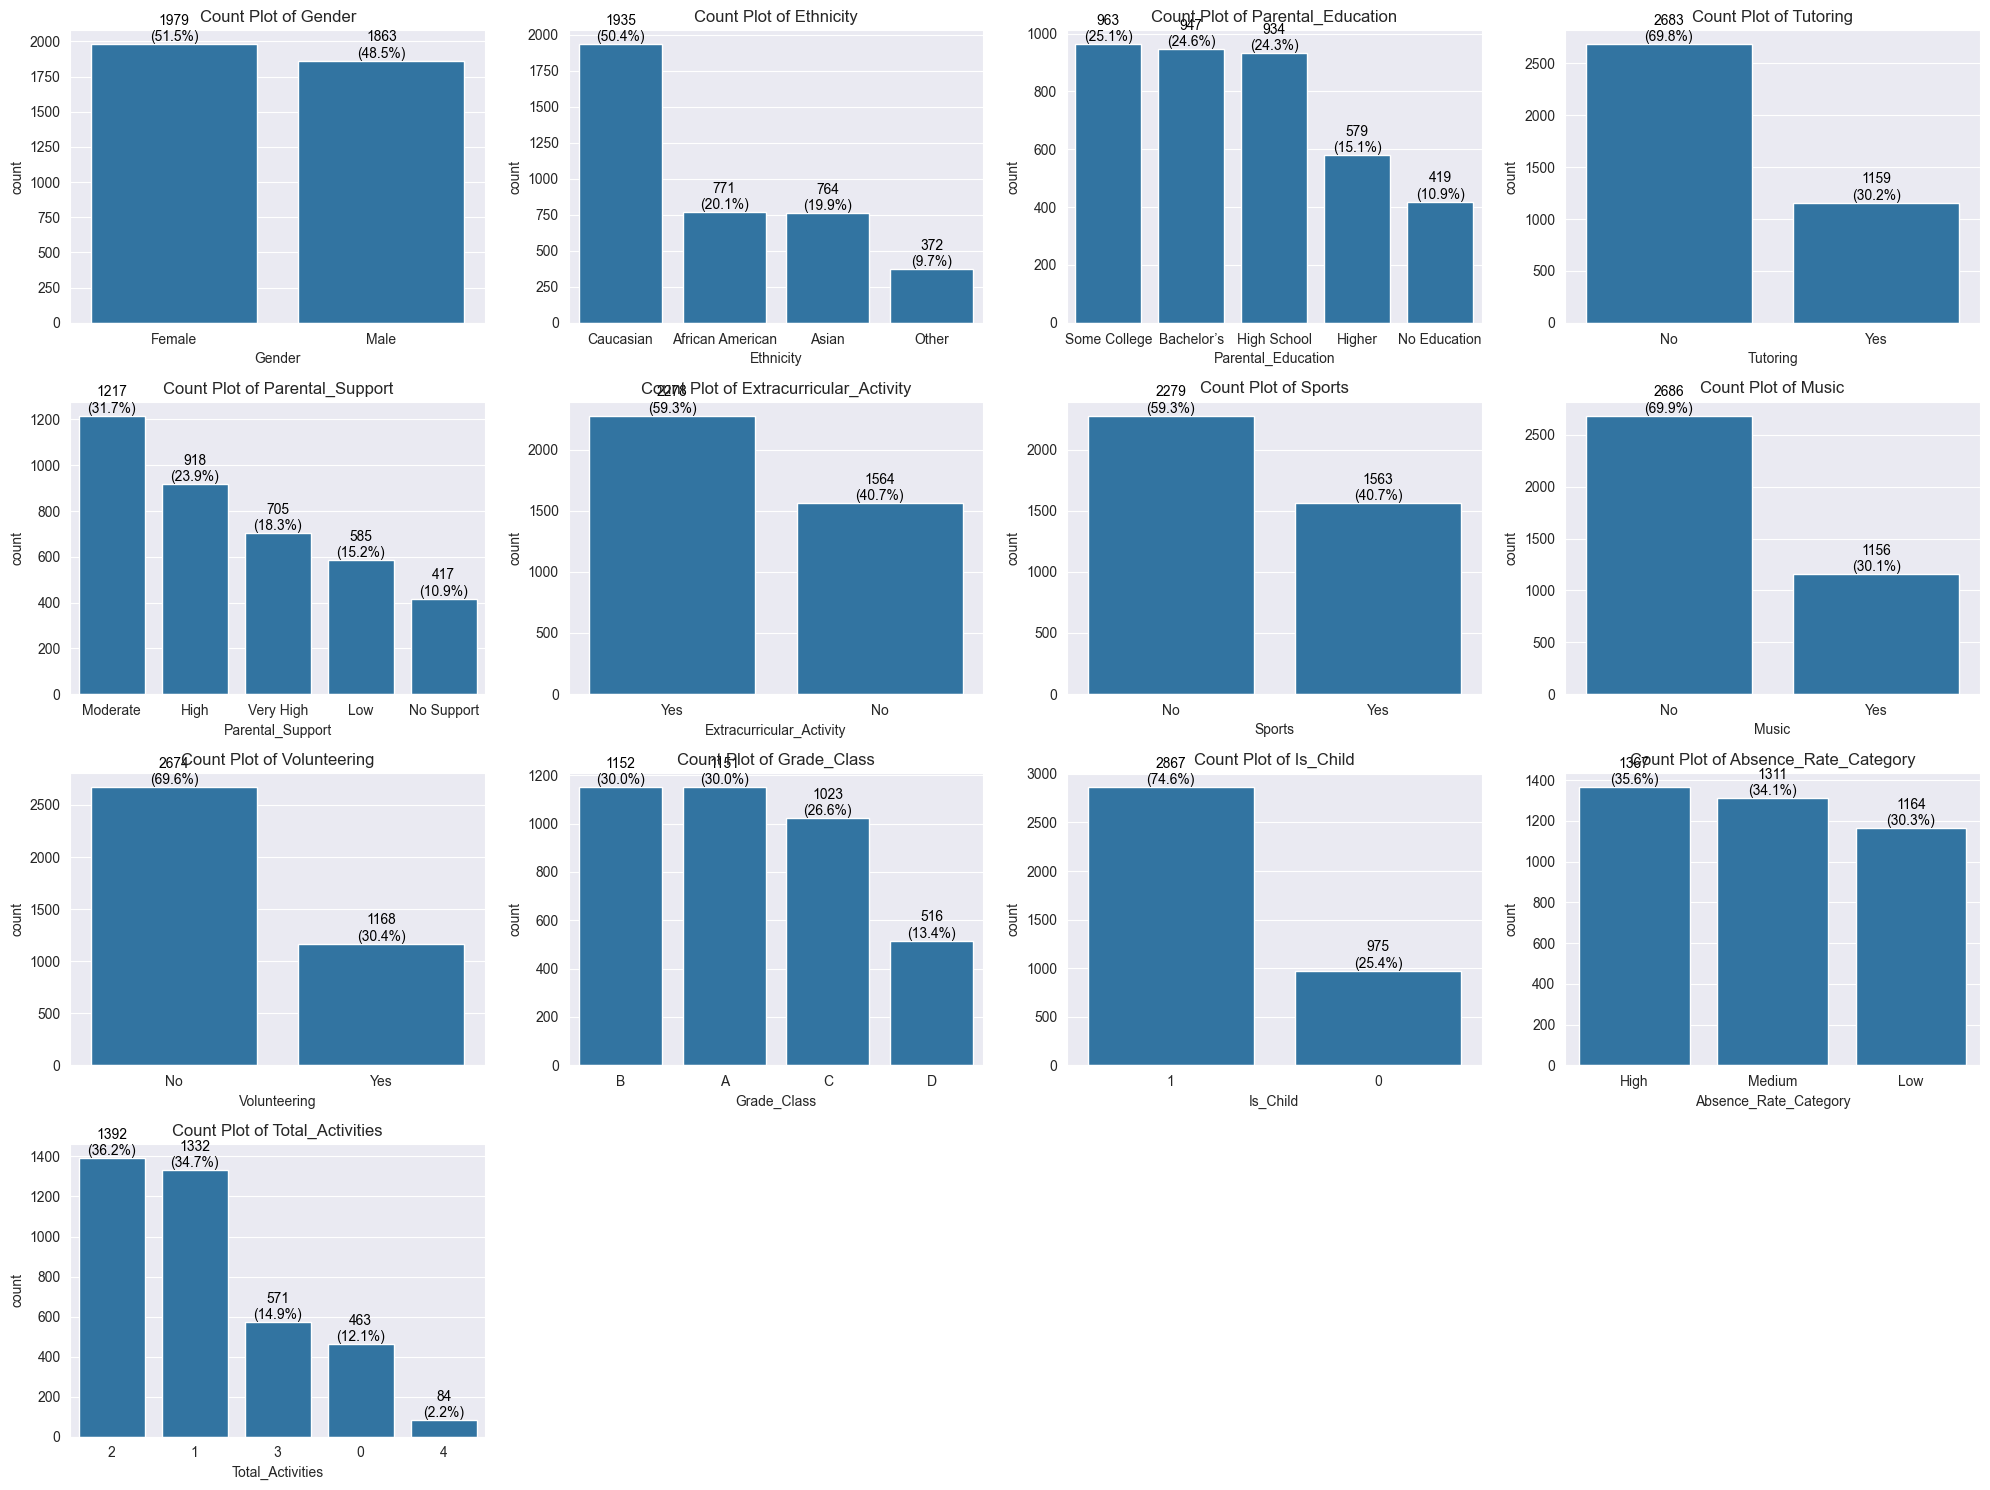

In [31]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

total = len(df)  # total rows for percentage

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=ax)

    # Annotate counts and percentages
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total
        ax.annotate(f'{count}\n({percent:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 0), textcoords='offset points')

    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels())

# Remove unused subplot axes (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### 5.1.2 Numerical Features

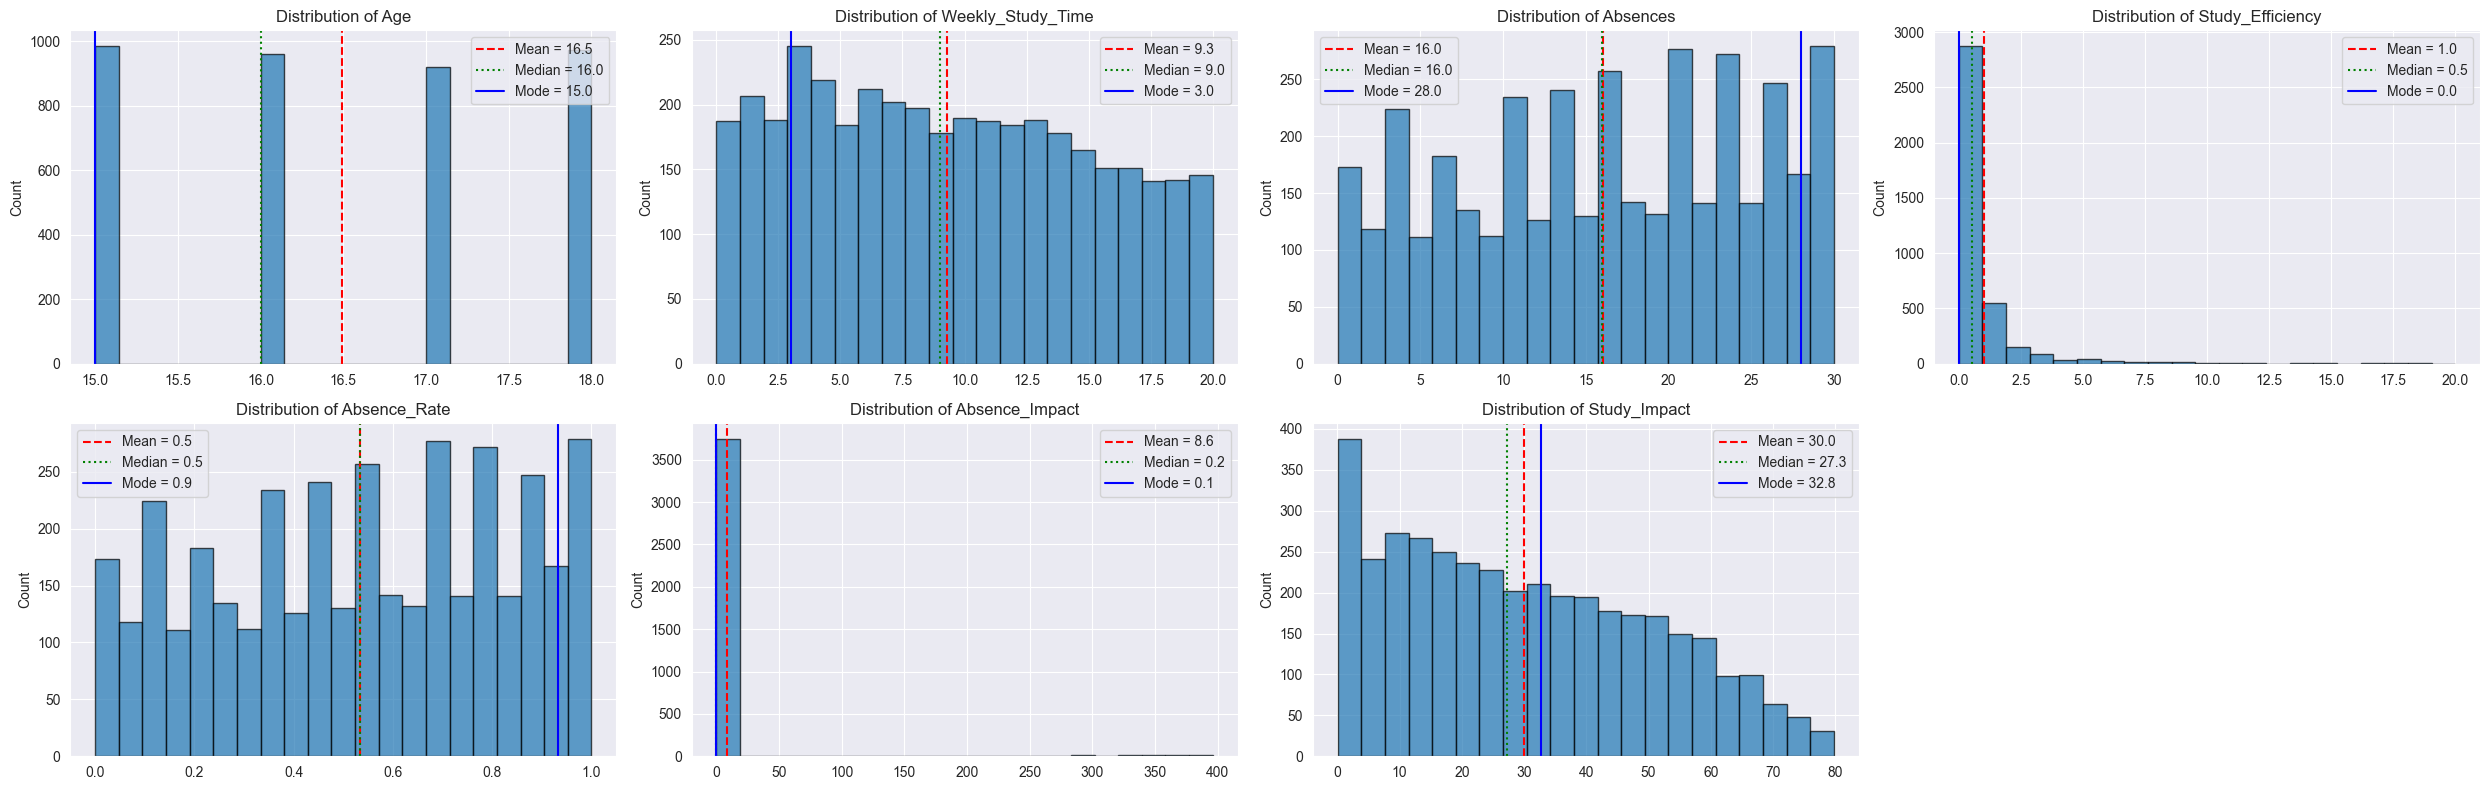

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(25, 8))
axes = axes.flatten()

total = len(df)  # total rows for percentage

for i, col in enumerate(num_cols):
    ax = axes[i]

    # Use ax.hist() for numerical distributions, which returns counts and bins
    counts, bins, patches = ax.hist(df[col], bins=21, edgecolor='black', alpha=0.7)

    # Annotate percentages in bins
    if col == "Sessions per Week":
        for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
            if count > 0:
                percent = 100 * count / total
                x = (bin_left + bin_right) / 2
                y = count
                ax.annotate(f'{percent:.1f}%',
                            (x, y), ha='center', va='bottom',
                            fontsize=8, color='black', xytext=(0, 3),
                            textcoords='offset points')

    # Add mean, median, and mode lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.1f}")
    ax.axvline(median_val, color='green', linestyle=':', label=f"Median = {median_val:.1f}")

    # Check if the mode exists before trying to plot it
    mode_vals = df[col].mode()
    if not mode_vals.empty:
        mode_val = mode_vals[0]
        ax.axvline(mode_val, color='blue', linestyle='-', label=f"Mode = {mode_val:.1f}")
    ax.legend()

    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel("Count")

# Turn off any unused axes
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### 5.1.3 Target Distribution

<Figure size 800x800 with 0 Axes>

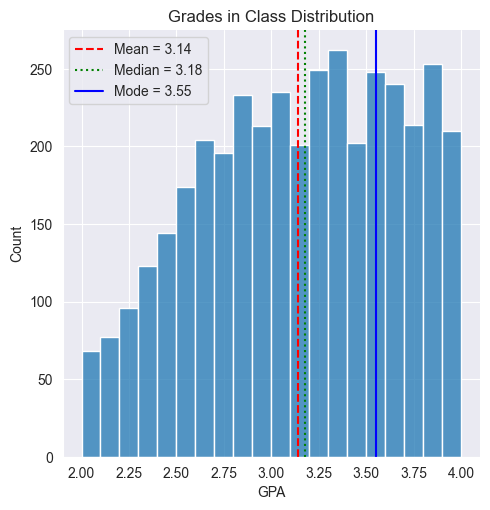

In [33]:
plt.figure(figsize=(8, 8))
ax = sns.displot( 
    data=(df["GPA"]), bins= 20
    
)
# Add mean, median, and mode lines
mean_val = df["GPA"].mean()
median_val = df["GPA"].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle=':', label=f"Median = {median_val:.2f}")

mode_vals = df["GPA"].mode()
if not mode_vals.empty:
    mode_val = mode_vals[0]
    plt.axvline(mode_val, color='blue', linestyle='-', label=f"Mode = {mode_val:.2f}")
plt.legend()

plt.title("Grades in Class Distribution")
plt.show()

##### plotting GPA^2 

<Figure size 800x800 with 0 Axes>

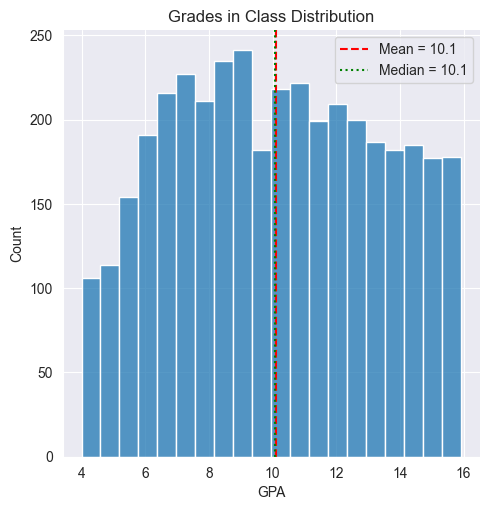

In [34]:
plt.figure(figsize=(8, 8))
ax = sns.displot( 
    data=(df[df["GPA"] < 4.00]["GPA"]**2), bins= 20
    
)
# Add mean, median, and mode lines
mean_val = (df[df["GPA"] < 4.00]["GPA"]**2).mean()
median_val = (df[df["GPA"] < 4.00]["GPA"]**2).median()
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle=':', label=f"Median = {median_val:.1f}")

plt.legend()

plt.title("Grades in Class Distribution")
plt.show()

##### Transforming GPA to its square for better distributed target

In [35]:
df["GPA^2"] = df["GPA"]**2 # will be predicted rather than GPA

<Figure size 800x800 with 0 Axes>

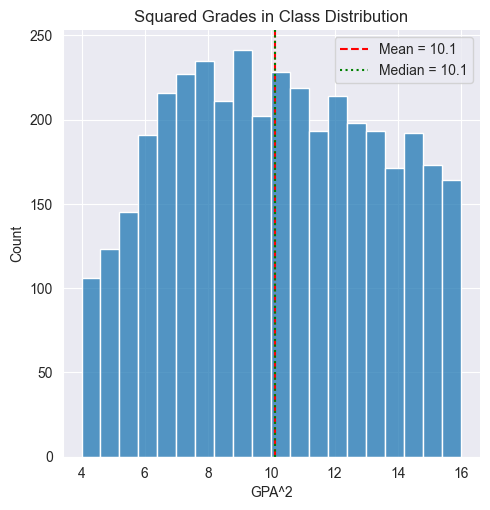

In [36]:
plt.figure(figsize=(8, 8))
ax = sns.displot( 
    data=(df["GPA^2"]), bins= 20
    
)
# Add mean, median, and mode lines
mean_val = df["GPA^2"].mean()
median_val = df["GPA^2"].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle=':', label=f"Median = {median_val:.1f}")

plt.legend()

plt.title("Squared Grades in Class Distribution")
plt.show()

In [37]:
num_cols.append("GPA^2")

### 5.2 Bi Variate Analysis

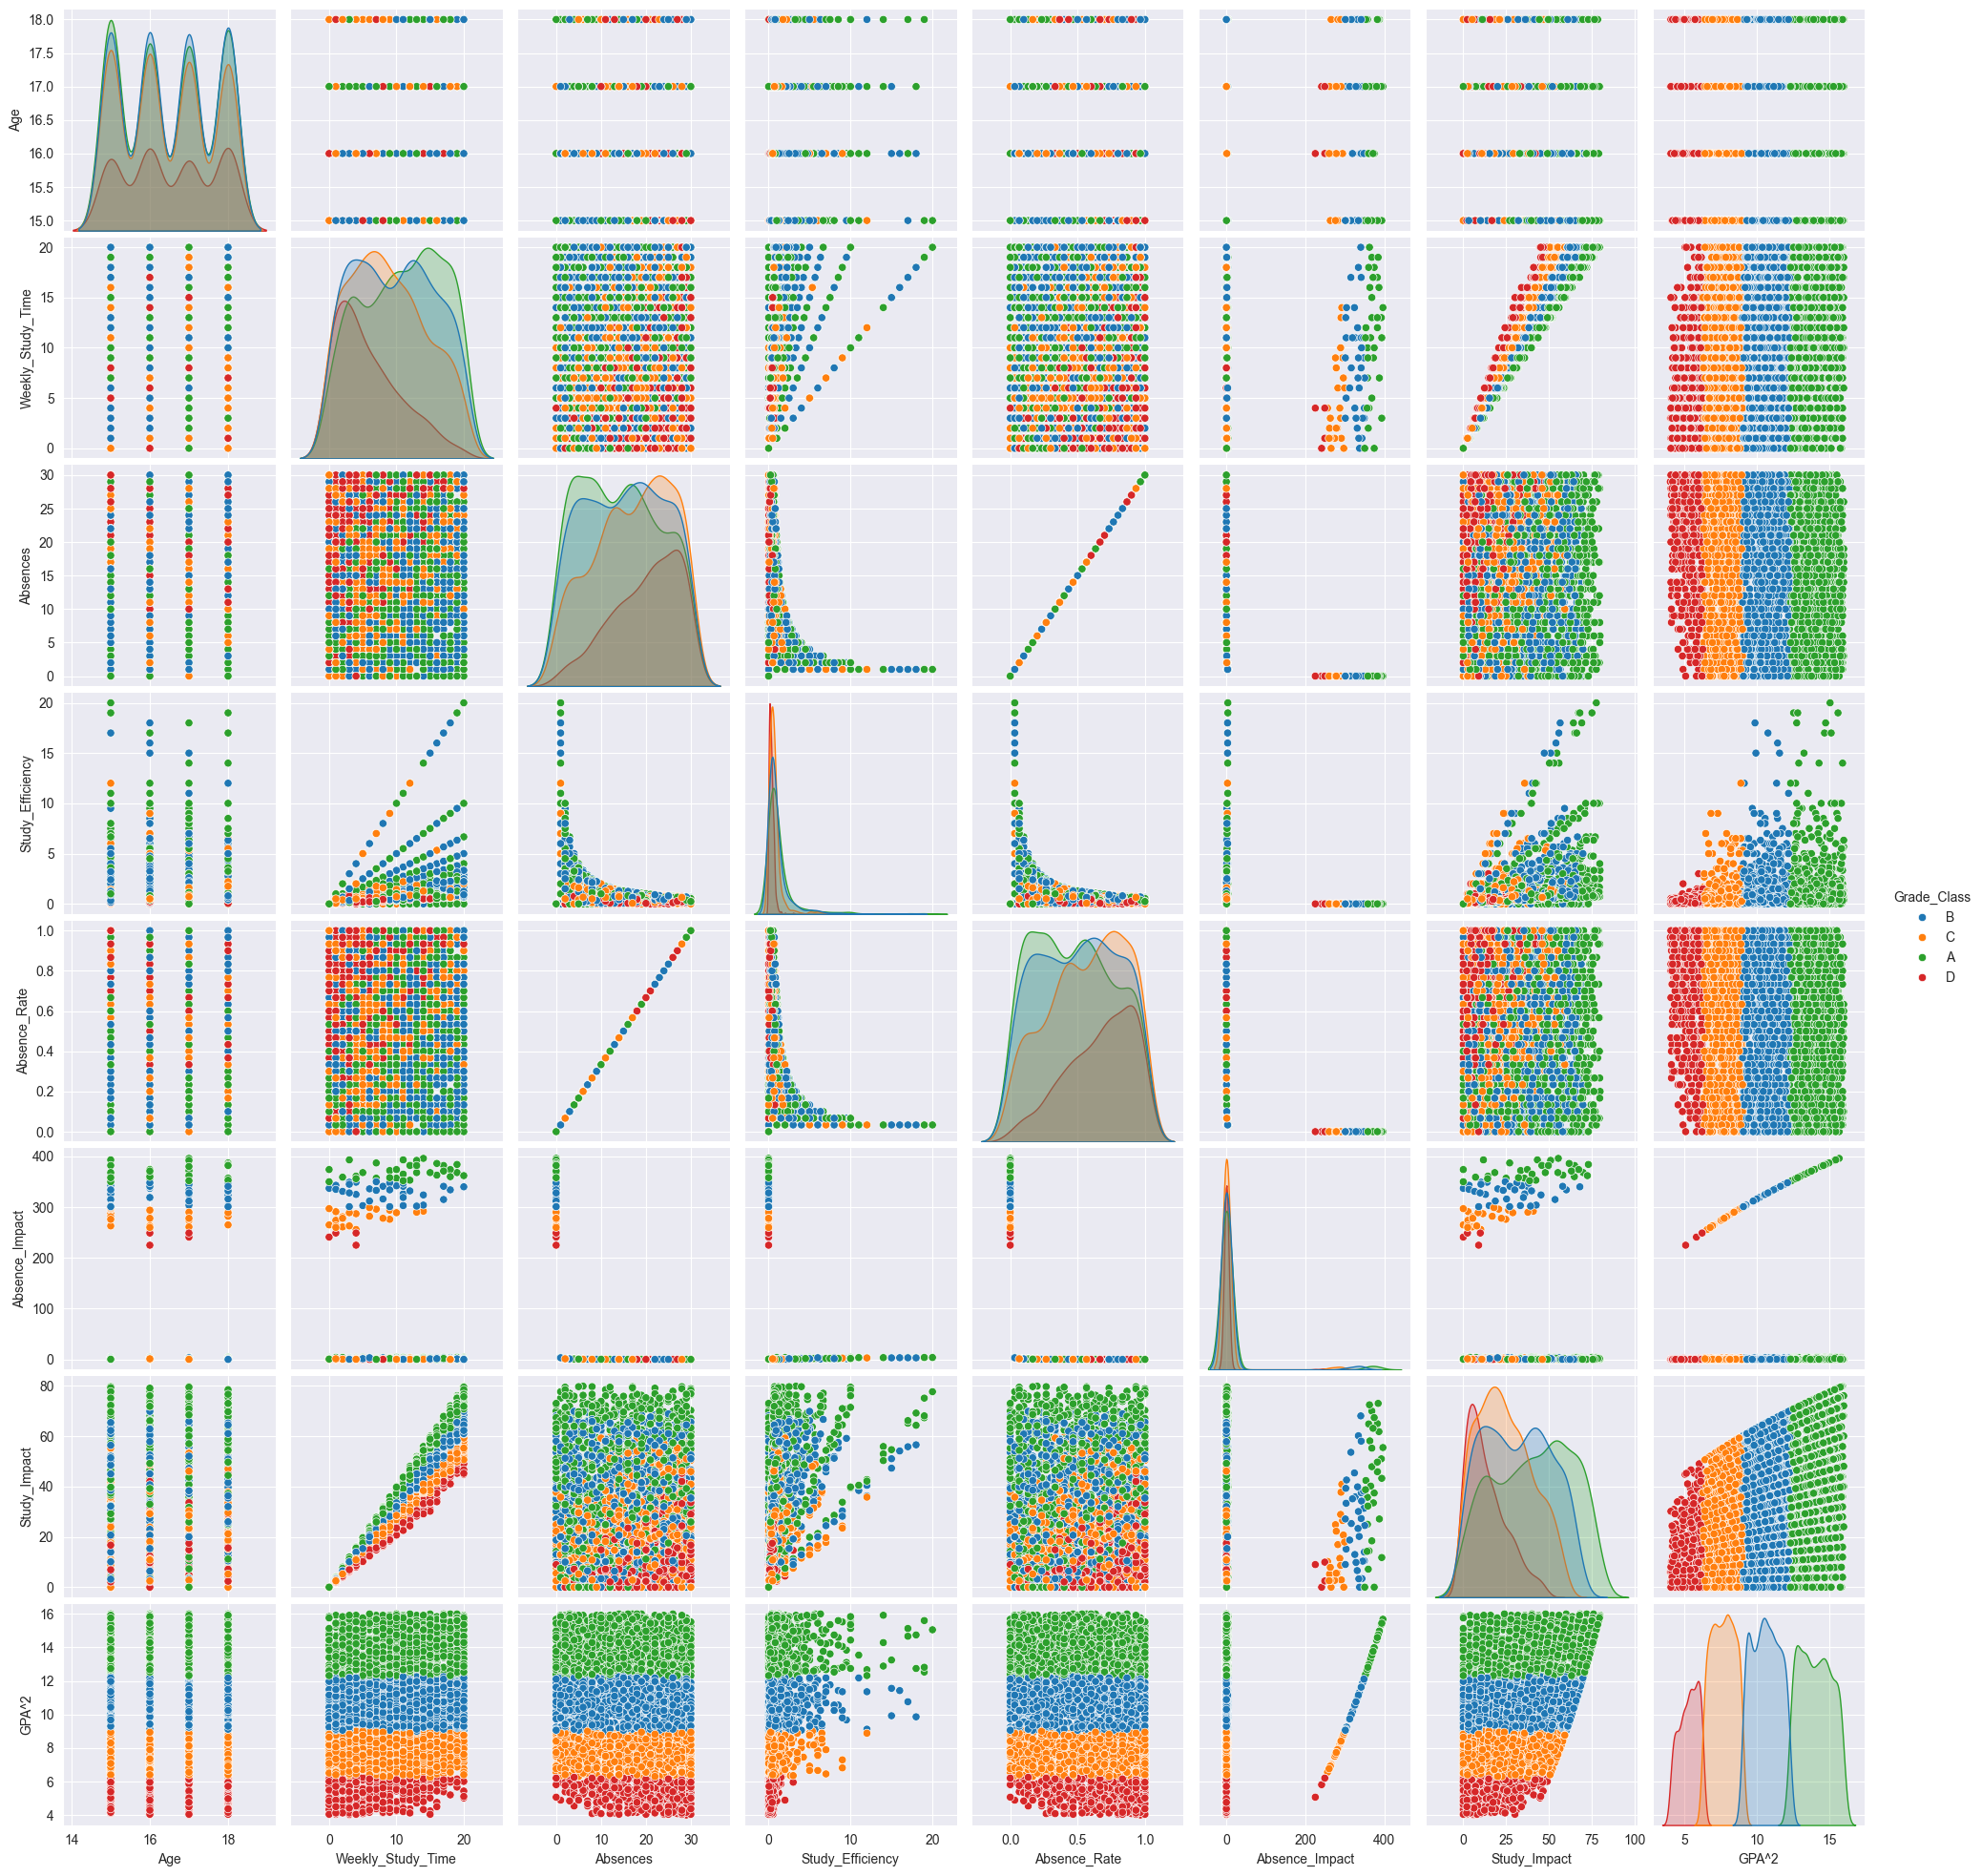

In [38]:
sns.pairplot(df, hue="Grade_Class", vars=num_cols)
plt.show()

What is the average age of each gender?

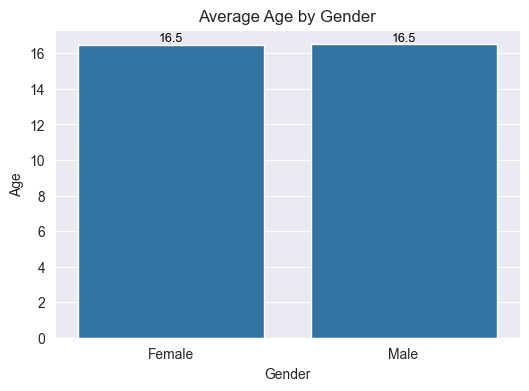

In [39]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="Gender", y="Age", data=df, estimator=np.mean, ci=None)

# annotate mean
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}',
                (p.get_x() + p.get_width()/2., value),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title("Average Age by Gender")
plt.show()

What are the GPA distribution of each gender?

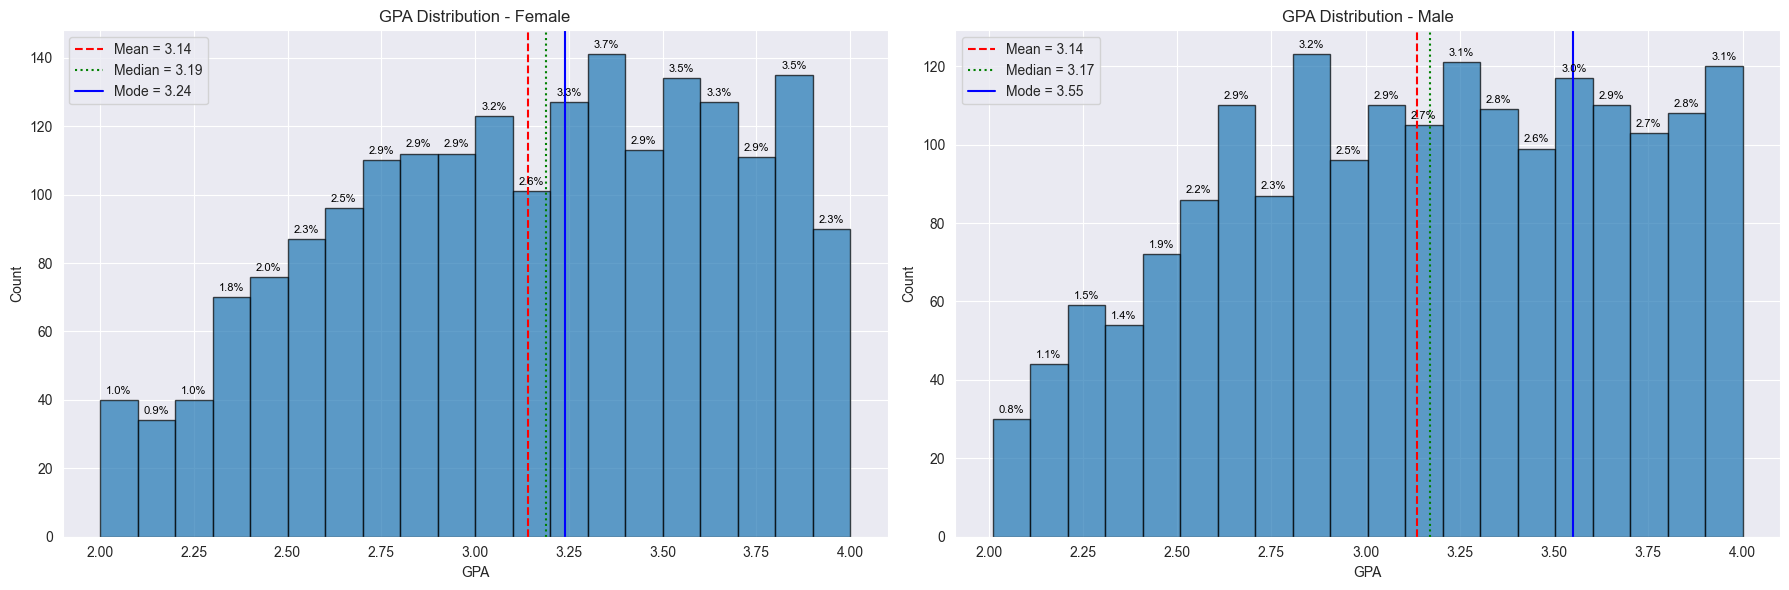

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

total = len(df)  # total rows for percentage
genders = df["Gender"].unique()

for i, gender in enumerate(genders):
    ax = axes[i]

    # Select GPA values for this gender
    subset = df[df["Gender"] == gender]["GPA"]

    # Plot histogram
    counts, bins, patches = ax.hist(subset, bins=20, edgecolor='black', alpha=0.7)

    # Annotate percentages on bins
    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            percent = 100 * count / total
            x = (bin_left + bin_right) / 2
            y = count
            ax.annotate(f'{percent:.1f}%',
                        (x, y), ha='center', va='bottom',
                        fontsize=8, color='black', xytext=(0, 3),
                        textcoords='offset points')

    # Add mean, median, and mode lines
    mean_val = subset.mean()
    median_val = subset.median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f"Mean = {mean_val:.2f}")
    ax.axvline(median_val, color='green', linestyle=':', label=f"Median = {median_val:.2f}")

    mode_vals = subset.mode()
    if not mode_vals.empty:
        mode_val = mode_vals[0]
        ax.axvline(mode_val, color='blue', linestyle='-', label=f"Mode = {mode_val:.2f}")

    ax.legend()
    ax.set_title(f"GPA Distribution - {gender}")
    ax.set_xlabel("GPA")
    ax.set_ylabel("Count")

# Remove any unused axes if genders < len(axes)
for j in range(len(genders), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Does tutoring affect grade?

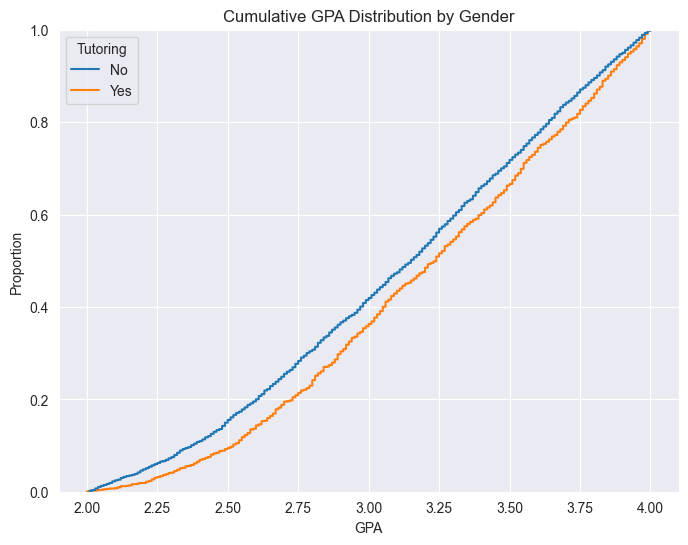

In [41]:
plt.figure(figsize=(8,6))
sns.ecdfplot(data=df, x="GPA", hue="Tutoring")
plt.title("Cumulative GPA Distribution by Gender")
plt.show()


Which age is involved the most in Extracurricular Activity?

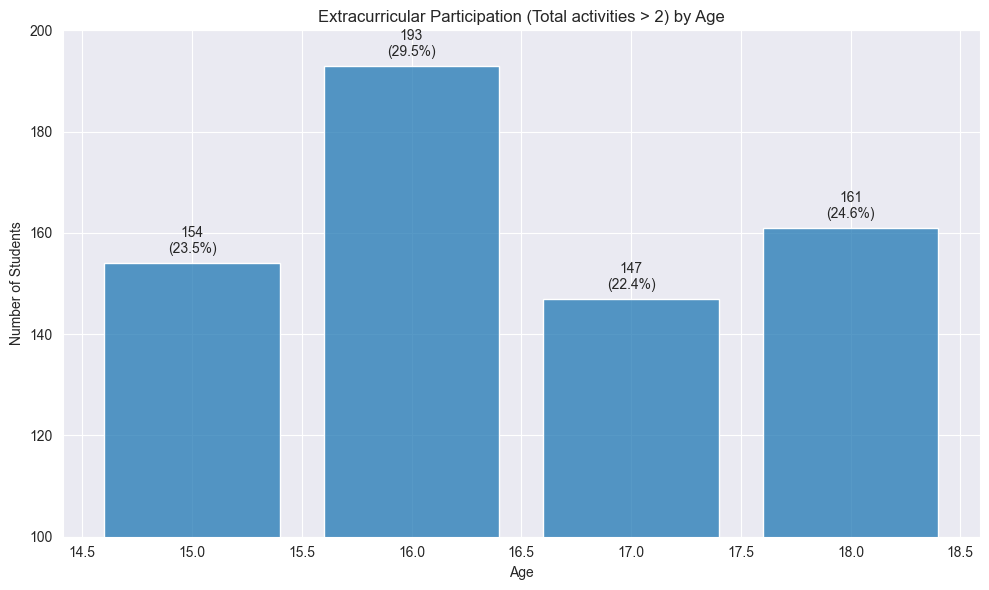

In [42]:
filtered_df = df[df["Total_Activities"] >= 3]

# Create the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Create a histogram using seaborn.histplot with counts
ax = sns.histplot(data=filtered_df, x="Age", discrete=True, shrink=0.8, stat='count')

# Add annotations for each bar
total_participants = len(filtered_df)
for p in ax.patches:
    # Get the height of the bar (the count)
    height = p.get_height()

    # Calculate the percentage
    percentage = (height / total_participants) * 100

    # Add the annotation text
    ax.annotate(
        f'{int(height)}\n({percentage:.1f}%)',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Extracurricular Participation (Total activities > 2) by Age")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.ylim([100, 200])
plt.tight_layout()
plt.show()

How many students having parental support and long weekly study time get high grades?

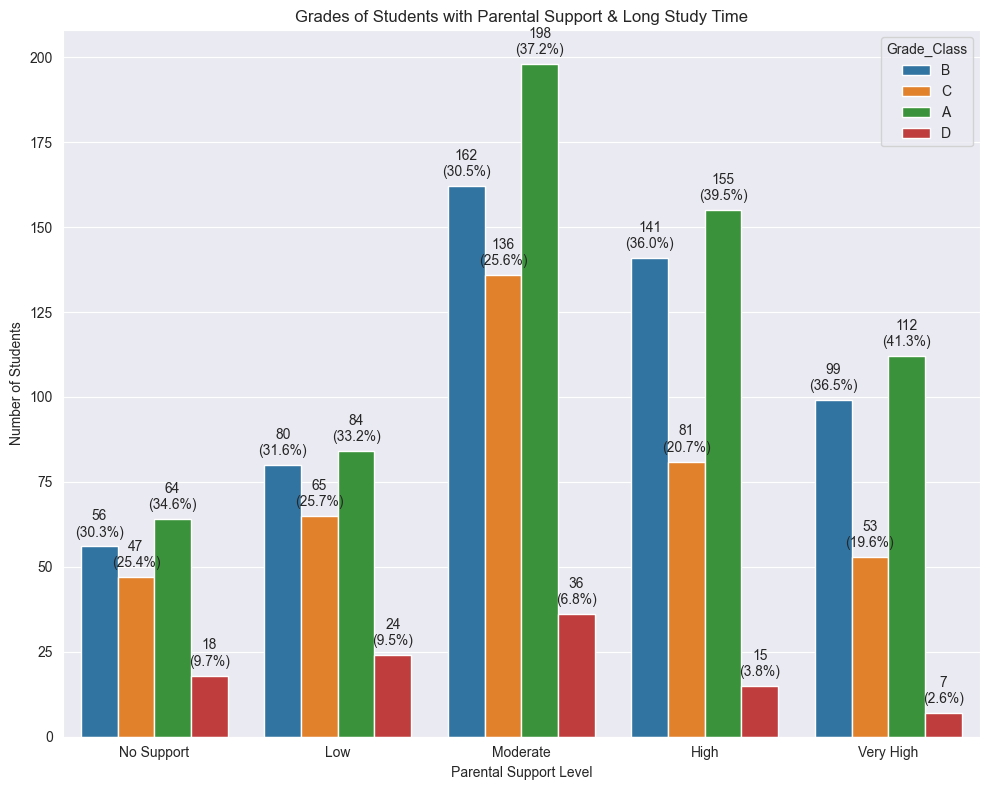

In [43]:
long_study = df["Weekly_Study_Time"] > 10
subset = df[long_study]

# Create the count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=subset, x="Parental_Support", hue="Grade_Class",
                   order=["No Support", "Low", "Moderate", "High", "Very High"])

plt.title("Grades of Students with Parental Support & Long Study Time")
plt.xlabel("Parental Support Level")
plt.ylabel("Number of Students")

# Get the total count for each x-category to calculate percentages
totals = subset.groupby('Parental_Support').size()

# Annotate each bar with its value and percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get the x-coordinate to find the corresponding 'Parental_Support' category
        x_coord = p.get_x() + p.get_width() / 2
        # Round the x-coordinate to match the category label
        x_category = round(x_coord)

        # Get the total for this category from the pre-calculated 'totals'
        parental_support_level = ax.xaxis.get_ticklabels()[x_category].get_text()
        total_for_category = totals.get(parental_support_level, 0)

        # Calculate percentage
        percentage = (height / total_for_category) * 100

        ax.annotate(
            f'{int(height)}\n({percentage:.1f}%)',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

Do students with high parental education study more time?

Parental_Education
Bachelor’s      9.0
High School     9.0
Higher          8.0
No Education    9.0
Some College    9.0
Name: Weekly_Study_Time, dtype: float64


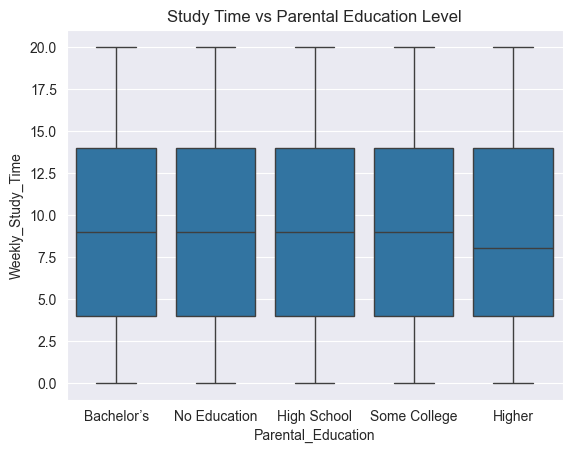

In [44]:
medians = df.groupby('Parental_Education')['Weekly_Study_Time'].median()

# Print the result
print(medians)

sns.boxplot(data=df, x="Parental_Education", y="Weekly_Study_Time")
plt.title("Study Time vs Parental Education Level")
plt.show()

Which ethnicity gets high grades?

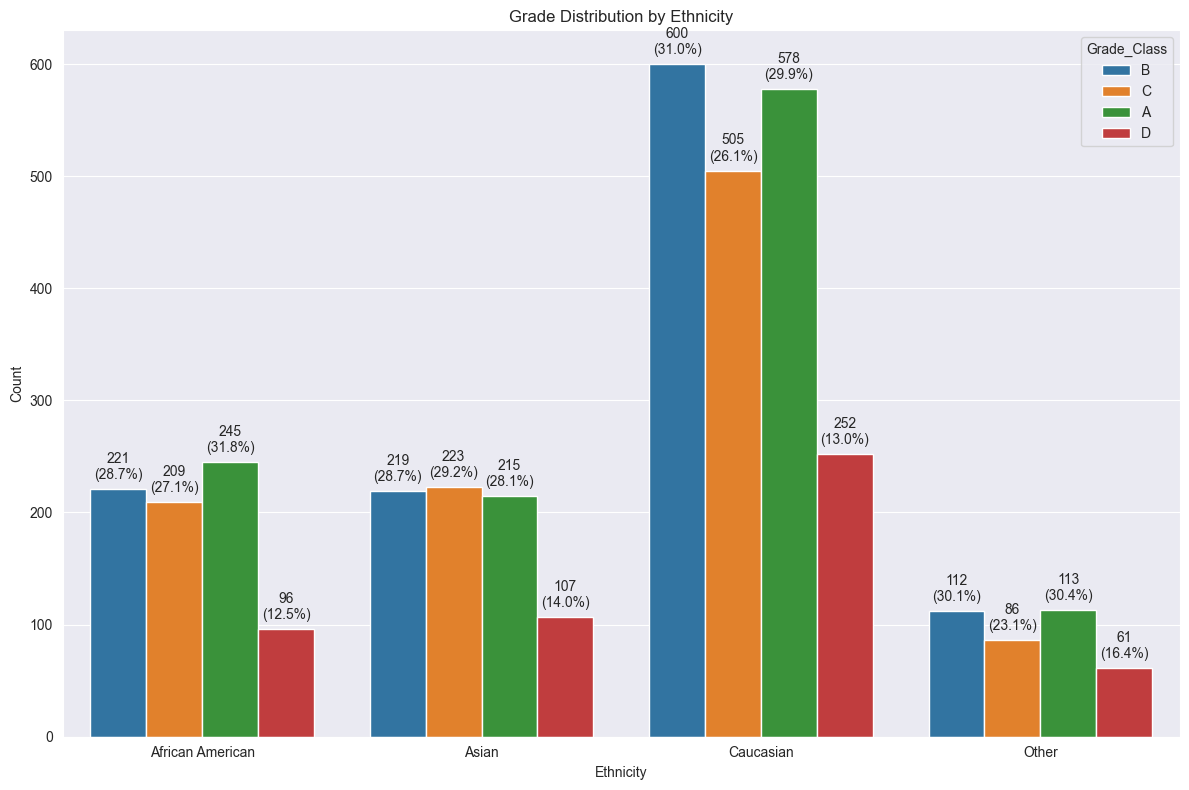

In [45]:
# Create the countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x="Ethnicity", hue="Grade_Class")

plt.title("Grade Distribution by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count")

# Calculate the total count for each Ethnicity category
ethnicity_totals = df.groupby('Ethnicity').size().reset_index(name='Total')

# Annotate each bar with its count and percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get the x-coordinate to find the corresponding 'Ethnicity' category
        x_coord = p.get_x() + p.get_width() / 2

        # Determine the category label
        x_category_index = int(round(x_coord))
        ethnicity_level = ax.xaxis.get_ticklabels()[x_category_index].get_text()

        # Get the total for this category from the pre-calculated 'ethnicity_totals'
        total_for_category = ethnicity_totals.loc[ethnicity_totals['Ethnicity'] == ethnicity_level, 'Total'].iloc[0]

        # Calculate percentage
        percentage = (height / total_for_category) * 100

        ax.annotate(
            f'{int(height)}\n({percentage:.1f}%)',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

Do students with high parental education tend to get high grades?

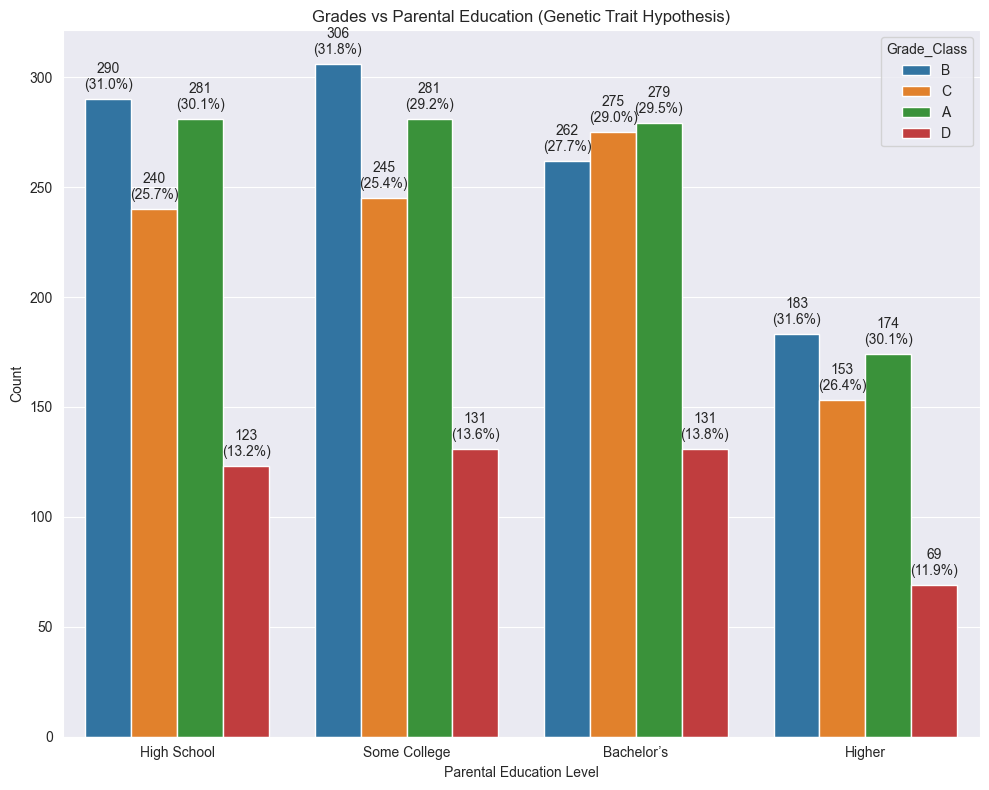

In [46]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x="Parental_Education", hue="Grade_Class",
                   order=['High School', 'Some College', 'Bachelor’s', 'Higher'])

plt.title("Grades vs Parental Education (Genetic Trait Hypothesis)")
plt.xlabel("Parental Education Level")
plt.ylabel("Count")

# Calculate the total count for each Parental_Education category
parental_education_totals = df.groupby('Parental_Education').size().reset_index(name='Total')

# Annotate each bar with its count and percentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get the x-coordinate to find the corresponding 'Parental_Education' category
        x_coord = p.get_x() + p.get_width() / 2

        # Get the category from the tick labels
        x_category = round(x_coord)
        parental_support_level = ax.xaxis.get_ticklabels()[x_category].get_text()

        # Look up the total for this category
        total_for_category = parental_education_totals.loc[parental_education_totals['Parental_Education'] == parental_support_level, 'Total'].iloc[0]

        # Calculate percentage
        percentage = (height / total_for_category) * 100

        ax.annotate(
            f'{int(height)}\n({percentage:.1f}%)',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()

What are the mode grades of students in each activity?

### 5.3 Multi variate Analysis

correlation between numerical features and target

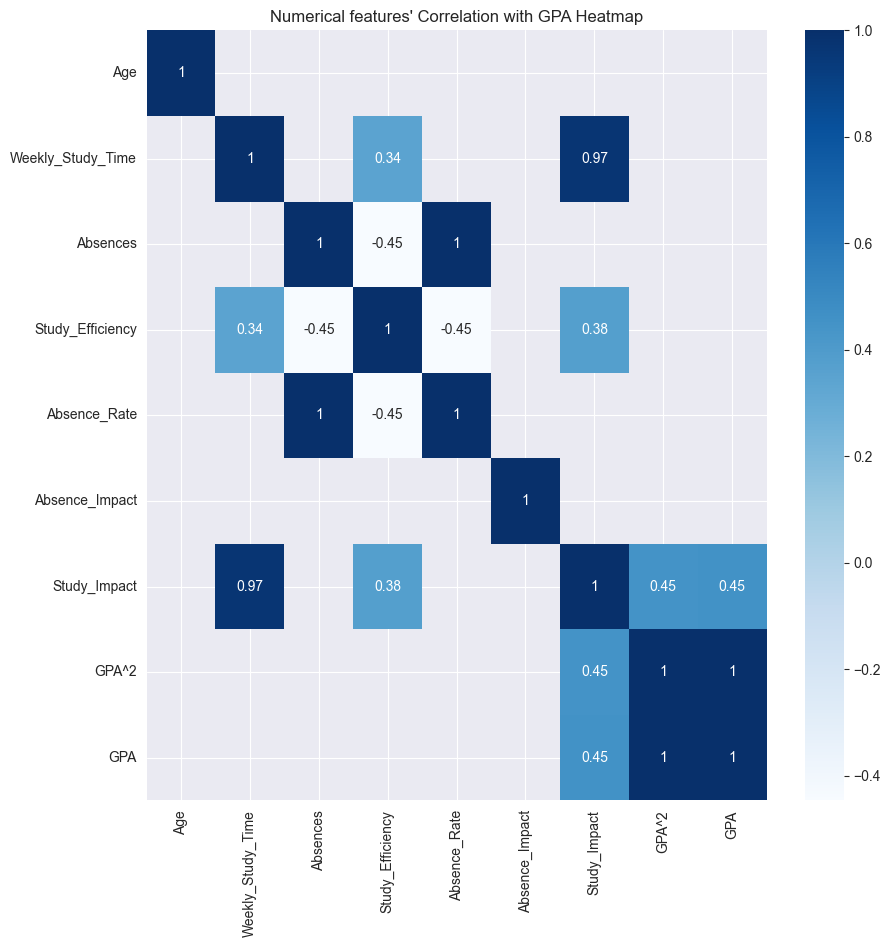

In [47]:
plt.figure(figsize=(10, 10))

# Calculate correlation including the encoded target variable
corr = pd.concat([df[num_cols + ["GPA"]]], axis=1).corr()

# Plot heatmap
sns.heatmap(corr[abs(corr) >= 0.3], annot=True, cmap="Blues")
plt.title("Numerical features' Correlation with GPA Heatmap")
plt.show()

# 6. Data preProcessing

### 6.1 Encoding Categorical Features

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       3842 non-null   int64   
 1   Gender                    3842 non-null   object  
 2   Ethnicity                 3842 non-null   object  
 3   Parental_Education        3842 non-null   object  
 4   Weekly_Study_Time         3842 non-null   int64   
 5   Absences                  3842 non-null   int64   
 6   Tutoring                  3842 non-null   object  
 7   Parental_Support          3842 non-null   object  
 8   Extracurricular_Activity  3842 non-null   object  
 9   Sports                    3842 non-null   object  
 10  Music                     3842 non-null   object  
 11  Volunteering              3842 non-null   object  
 12  GPA                       3842 non-null   float64 
 13  Grade_Class               3842 non-null   object

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

binary_categories =  ["Gender", "Tutoring",
                      "Is_Child"
]
multi_class_categories = ["Ethnicity", "Parental_Education", "Parental_Support",
                          "Extracurricular_Activity", "Sports",
                          "Music", "Volunteering",
                          "Absence_Rate_Category",
                          "Grade_Class"
]

ct = ColumnTransformer(
    transformers=[
        ("binary", OrdinalEncoder(), binary_categories),   # works for multiple binary columns
        ("multi", OneHotEncoder(handle_unknown="ignore"), multi_class_categories)
    ],
    remainder="passthrough"   # keep other columns
)

# Fit and transform
data_encoded_np = ct.fit_transform(df)

data_encoded = pd.DataFrame(
    data_encoded_np,
    columns=ct.get_feature_names_out(),
    index=df.index   # keep original row indices
)

print("Feature Names:", ct.get_feature_names_out())

Feature Names: ['binary__Gender' 'binary__Tutoring' 'binary__Is_Child'
 'multi__Ethnicity_African American' 'multi__Ethnicity_Asian'
 'multi__Ethnicity_Caucasian' 'multi__Ethnicity_Other'
 'multi__Parental_Education_Bachelor’s'
 'multi__Parental_Education_High School'
 'multi__Parental_Education_Higher'
 'multi__Parental_Education_No Education'
 'multi__Parental_Education_Some College' 'multi__Parental_Support_High'
 'multi__Parental_Support_Low' 'multi__Parental_Support_Moderate'
 'multi__Parental_Support_No Support' 'multi__Parental_Support_Very High'
 'multi__Extracurricular_Activity_No'
 'multi__Extracurricular_Activity_Yes' 'multi__Sports_No'
 'multi__Sports_Yes' 'multi__Music_No' 'multi__Music_Yes'
 'multi__Volunteering_No' 'multi__Volunteering_Yes'
 'multi__Absence_Rate_Category_High' 'multi__Absence_Rate_Category_Low'
 'multi__Absence_Rate_Category_Medium' 'multi__Grade_Class_A'
 'multi__Grade_Class_B' 'multi__Grade_Class_C' 'multi__Grade_Class_D'
 'remainder__Age' 'remainder__

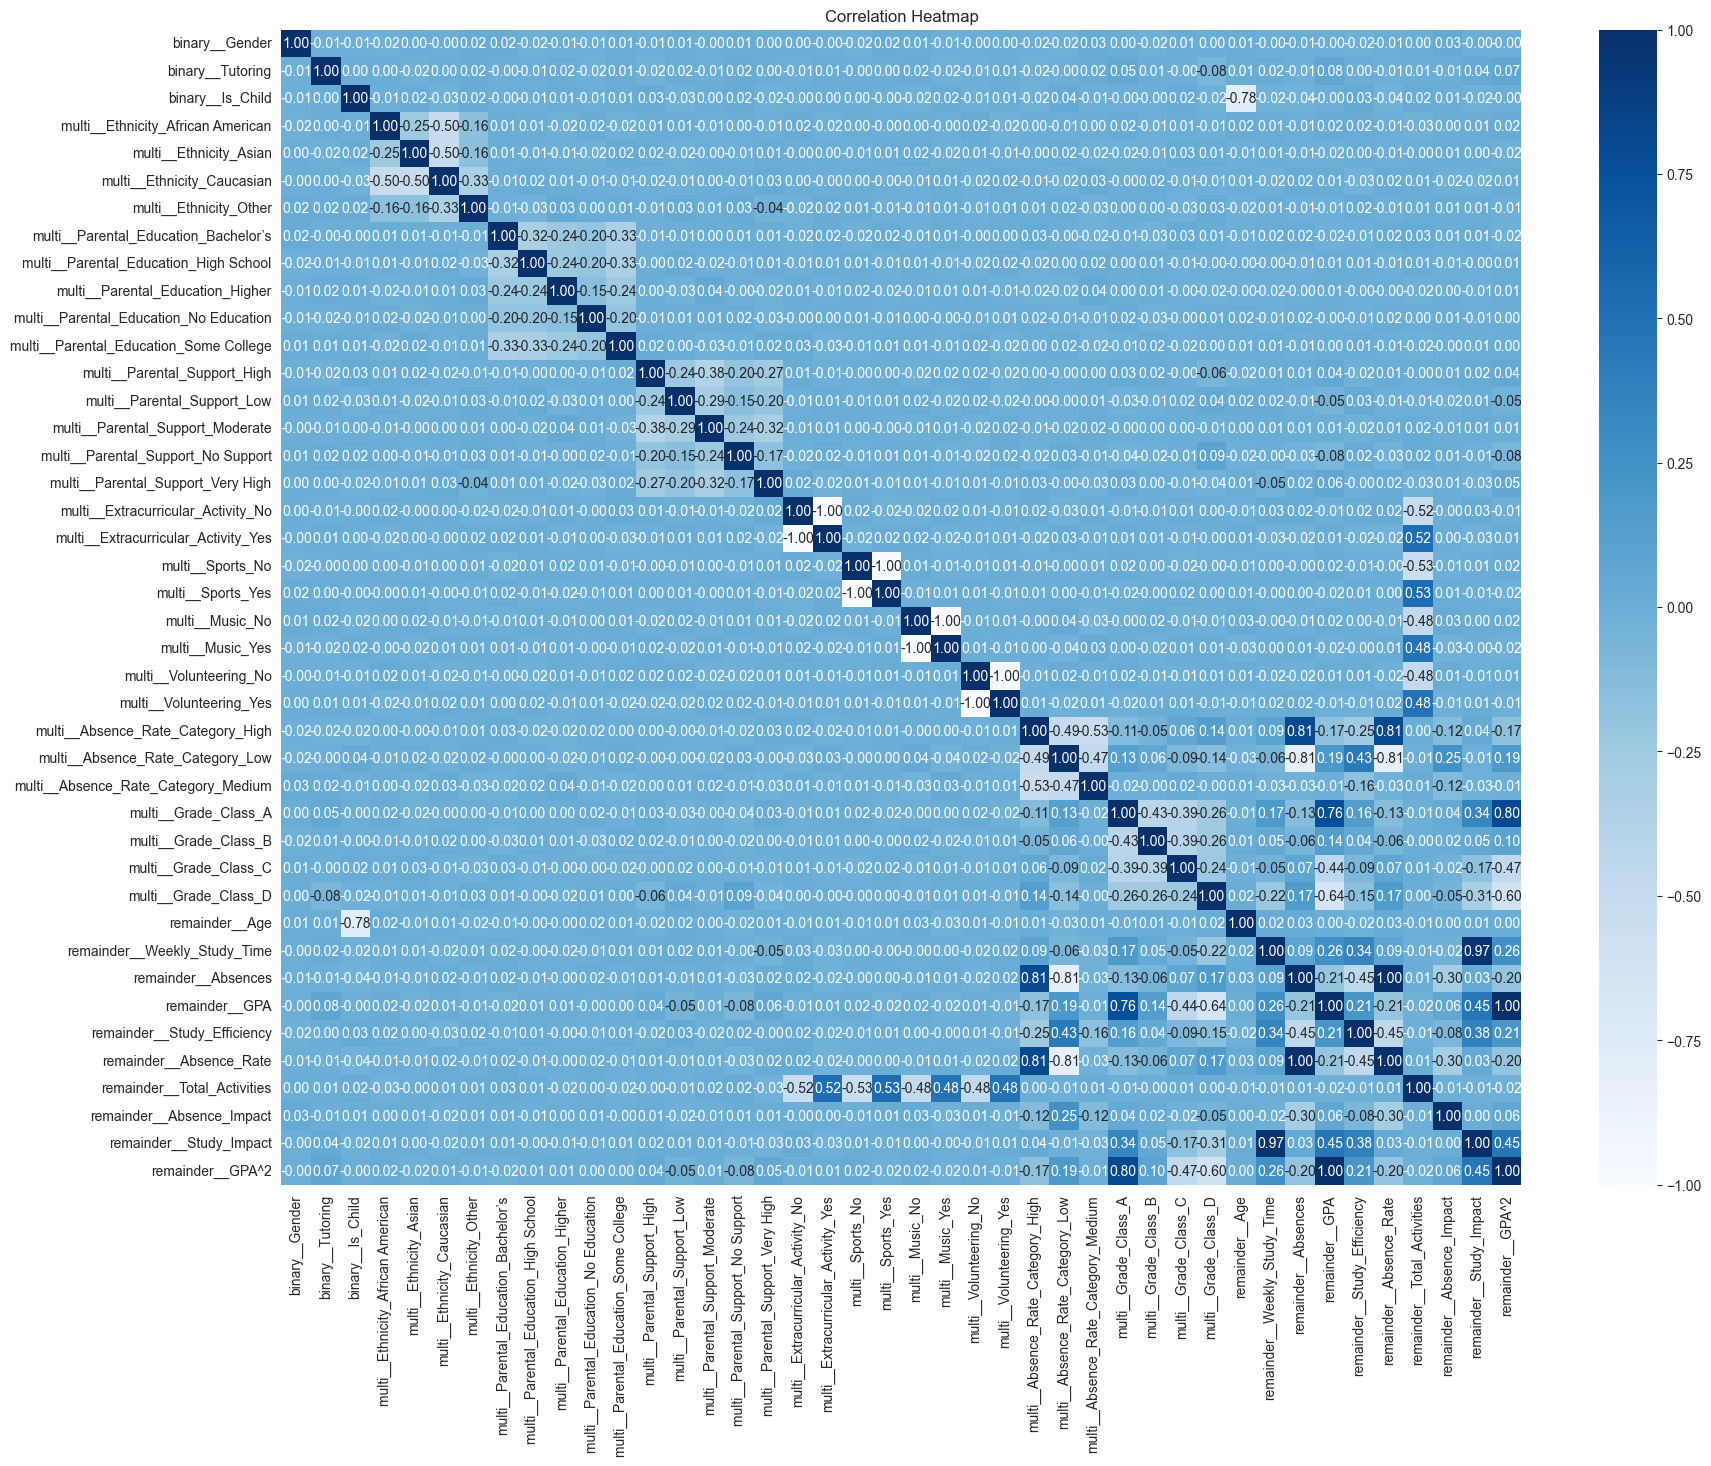

In [50]:
plt.figure(figsize=(20, 15))

corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

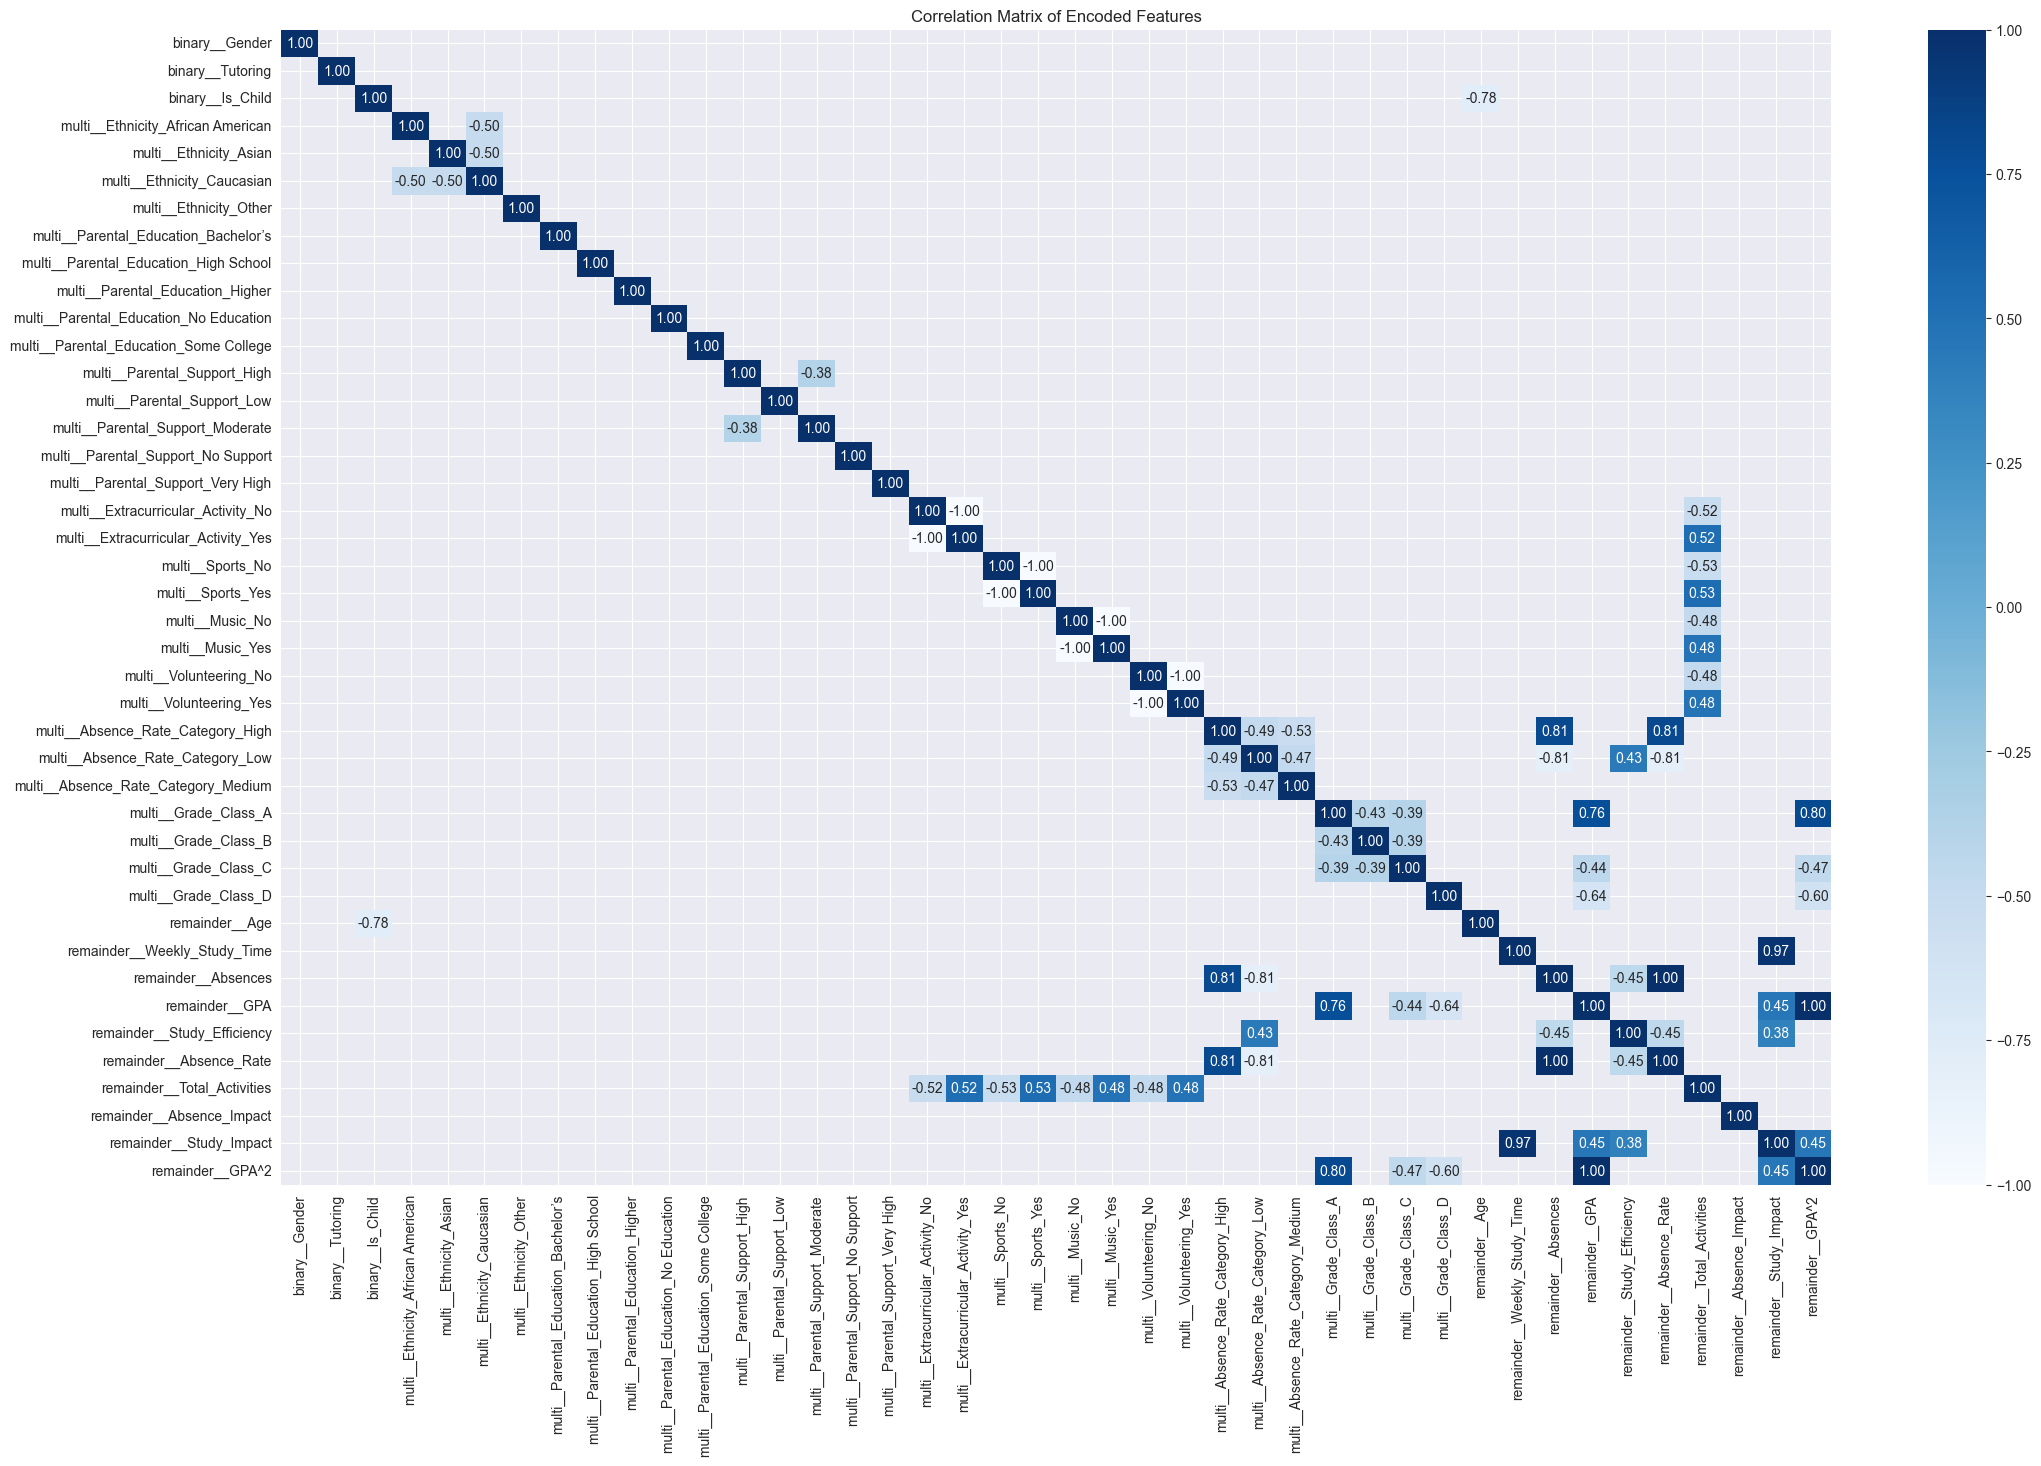

In [51]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr[abs(corr) > 0.35], annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Encoded Features")
plt.show()

### 6.2 Feature selection

In [53]:
X = data_encoded.drop(["remainder__GPA^2", "remainder__GPA", "multi__Grade_Class_A", "multi__Grade_Class_B", "multi__Grade_Class_C", "multi__Grade_Class_D"], axis=1)   # Features
y = data_encoded["remainder__GPA^2"]   # Target

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3842, 36)
y shape: (3842,)


In [54]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X, y)

important = rf.feature_importances_
Imp_Feat = pd.Series(important, index=X.columns).sort_values(ascending=False)

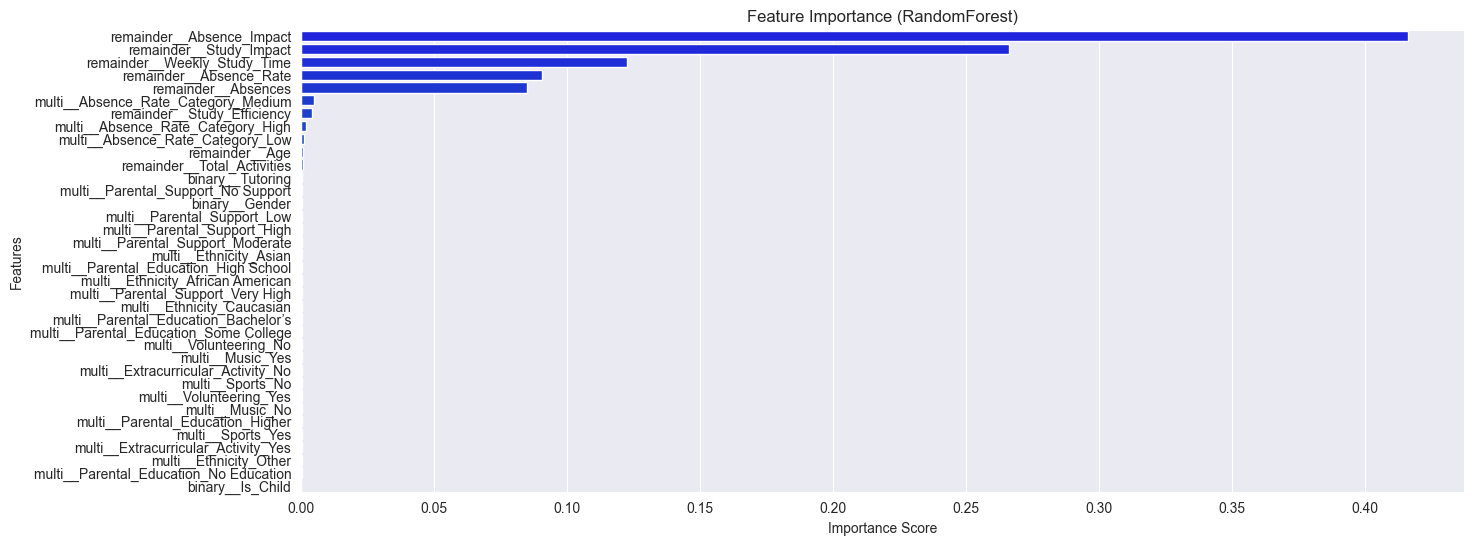

In [55]:
plt.figure(figsize=(15,6))
sns.barplot(x=Imp_Feat.values, y=Imp_Feat.index, palette="winter")
plt.title("Feature Importance (RandomForest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [56]:
from sklearn.feature_selection import SelectFromModel

threshold = 0.05 # keep features with importance > 1%
selector = SelectFromModel(rf, threshold=threshold, prefit=True)
X_selected = selector.transform(X)

In [57]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))
print("Number of Selected Features:", len(selected_features))

Selected Features: ['remainder__Weekly_Study_Time', 'remainder__Absences', 'remainder__Absence_Rate', 'remainder__Absence_Impact', 'remainder__Study_Impact']
Number of Selected Features: 5


### 6.2 Splitting Data for Train

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [59]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3073, 5)
X_test shape: (769, 5)
y_train shape: (3073,)
y_test shape: (769,)


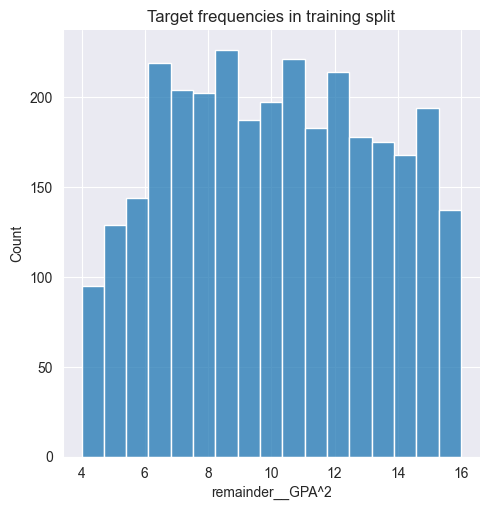

In [60]:
sns.displot(data= pd.DataFrame(y_train), x="remainder__GPA^2")
plt.title("Target frequencies in training split")
plt.show()

In [61]:
selected_features

Index(['remainder__Weekly_Study_Time', 'remainder__Absences',
       'remainder__Absence_Rate', 'remainder__Absence_Impact',
       'remainder__Study_Impact'],
      dtype='object')

In [62]:
pd.DataFrame(X_train, columns=selected_features).describe()

remainder__Weekly_Study_Time  remainder__Absences  \
count                   3073.000000          3073.000000   
mean                       9.230068            16.065734   
std                        5.868911             8.818828   
min                        0.000000             0.000000   
25%                        4.000000             9.000000   
50%                        9.000000            17.000000   
75%                       14.000000            24.000000   
max                       20.000000            30.000000   

       remainder__Absence_Rate  remainder__Absence_Impact  \
count              3073.000000                3073.000000   
mean                  0.535524                   9.189674   
std                   0.293961                  53.382852   
min                   0.000000                   0.067000   
25%                   0.300000                   0.128333   
50%                   0.566667                   0.188824   
75%                   0.800000                   0.373333   
max                   1.000000                 393.000000   

       remainder__Study_Impact  
count              3073.000000  
mean                 29.761897  
std                  20.424094  
min                   0.020100  
25%                  11.970000  
50%                  27.360000  
75%                  45.600000  
max                  79.600000

# 7. Modeling

### 7.1 Evaluation function for each model

In [63]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """Evaluate regression models with multiple metrics and residual plots."""

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Metrics
    train_rmse = mean_squared_error(y_train, y_pred_train)
    test_rmse  = mean_squared_error(y_test, y_pred_test)

    train_mae  = mean_absolute_error(y_train, y_pred_train)
    test_mae   = mean_absolute_error(y_test, y_pred_test)

    train_r2   = r2_score(y_train, y_pred_train)
    test_r2    = r2_score(y_test, y_pred_test)

    # --- Print Results ---
    print(f"=== {model_name} ===")
    print("Train RMSE :", train_rmse)
    print("Test RMSE  :", test_rmse)
    print("Train MAE  :", train_mae)
    print("Test MAE   :", test_mae)
    print("Train R²   :", train_r2)
    print("Test R²    :", test_r2)

    # Residual plot
    residuals = y_test - y_pred_test
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} - Residuals Plot")
    plt.show()

    return {
        "train_rmse": train_rmse, "test_rmse": test_rmse,
        "train_mae": train_mae,   "test_mae": test_mae,
        "train_r2": train_r2,     "test_r2": test_r2
    }

### 7.2 Creating Pipeline 

In [64]:
models = {
    "LR": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}

In [65]:
param_grids = {
    "LR": {  
    },
    "KNN": {
        "KNN__n_neighbors": np.arange(2, 15),
        "KNN__weights": ["uniform", "distance"]
    },
    "SVR": {
        "SVR__kernel": ["linear", "rbf"],
        "SVR__C": [0.1, 1, 10],
        "SVR__gamma": ["scale", "auto"]
    },
    "DT": {
        "DT__max_depth": [None, 5, 10, 20],
        "DT__min_samples_split": [5, 7, 10],
        "DT__min_samples_leaf": [2, 3, 5]
    },
    "RF": {
        "RF__n_estimators": [50, 100],
        "RF__max_depth": [None, 10, 20],
        "RF__min_samples_split": [2, 5, 10],
        "RF__min_samples_leaf": [1, 2, 5]
    }
}

Best parameters for LR: {}
Best train R²: 0.7181248240935445
Best test R²: 0.7159529834070468
--------------------------------------------------
=== LR ===
Train RMSE : 2.901765255220732
Test RMSE  : 2.938273341430146
Train MAE  : 1.2398245445638805
Test MAE   : 1.2356259118119515
Train R²   : 0.717976110533125
Test R²    : 0.7195787879095907


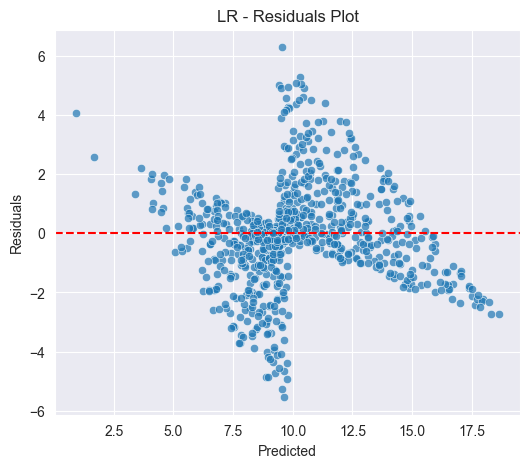

Best parameters for KNN: {'KNN__n_neighbors': np.int64(3), 'KNN__weights': 'distance'}
Best train R²: 1.0
Best test R²: 0.8400238399557498
--------------------------------------------------
=== KNN ===
Train RMSE : 0.0
Test RMSE  : 0.9819088026969228
Train MAE  : 0.0
Test MAE   : 0.6365780751007564
Train R²   : 1.0
Test R²    : 0.9062891621647109


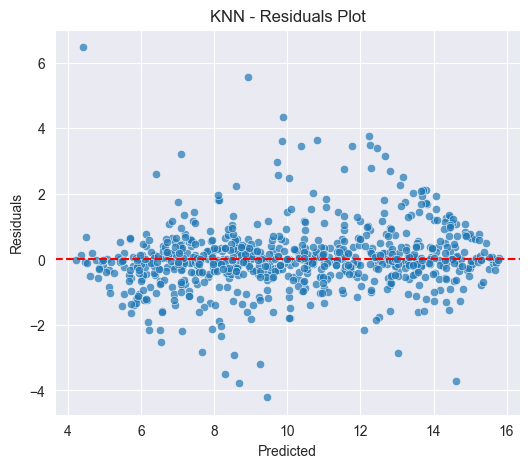

Best parameters for SVR: {'SVR__C': 10, 'SVR__gamma': 'scale', 'SVR__kernel': 'rbf'}
Best train R²: 0.8966441889976331
Best test R²: 0.8943628184807141
--------------------------------------------------
=== SVR ===
Train RMSE : 1.0183288102401888
Test RMSE  : 1.1768836125460937
Train MAE  : 0.4811964604332482
Test MAE   : 0.49116672463100164
Train R²   : 0.9010281581863289
Test R²    : 0.8876812703344737


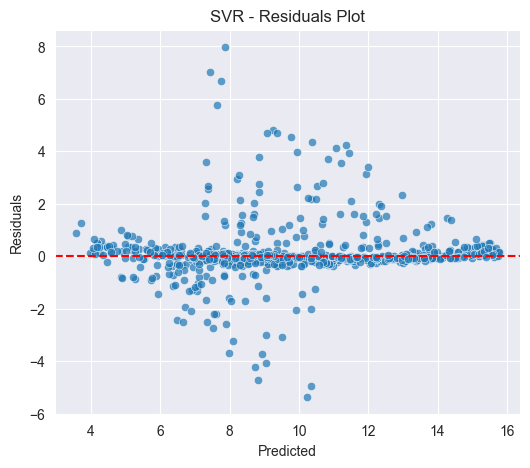

Best parameters for DT: {'DT__max_depth': None, 'DT__min_samples_leaf': 2, 'DT__min_samples_split': 5}
Best train R²: 0.9973331551067727
Best test R²: 0.986101018401597
--------------------------------------------------
=== DT ===
Train RMSE : 0.01837214670598764
Test RMSE  : 0.1200100874068054
Train MAE  : 0.08545604729363275
Test MAE   : 0.20801395752058952
Train R²   : 0.9982144026769373
Test R²    : 0.9885465474912855


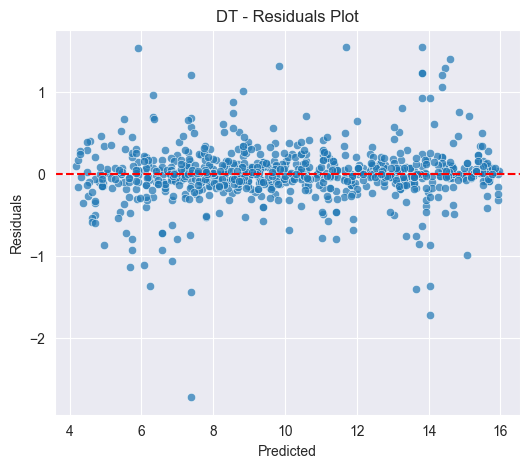

Best parameters for RF: {'RF__max_depth': None, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
Best train R²: 0.9992342463715185
Best test R²: 0.9949309768217202
--------------------------------------------------
=== RF ===
Train RMSE : 0.0048562303991158545
Test RMSE  : 0.05417364980361778
Train MAE  : 0.04177792613081712
Test MAE   : 0.11207838491547481
Train R²   : 0.9995280207512163
Test R²    : 0.9948298069049295


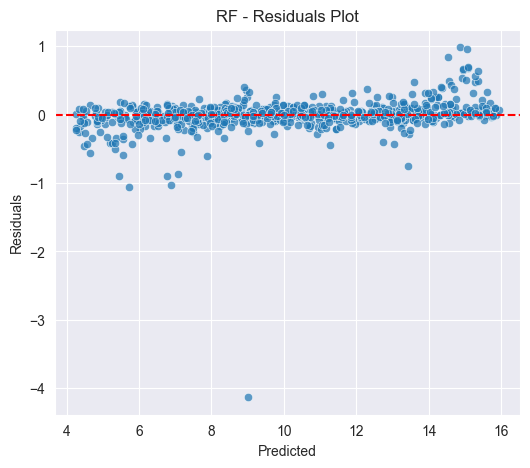

In [66]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

best_models = {}
models_results = {}

for model_name, model in models.items():
    steps = [("Scaler", StandardScaler()), (model_name, model)]
    pipe = Pipeline(steps=steps)

    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids.get(model_name, {}),
        scoring='r2',
        cv=5,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print("Best train R²:", grid_search.cv_results_['mean_train_score'][grid_search.best_index_])
    print("Best test R²:", grid_search.cv_results_['mean_test_score'][grid_search.best_index_])
    print('-' * 50)

    # Evaluate
    metrics = evaluate_regression_model(best_model, X_train, y_train, X_test, y_test, model_name)
    models_results[model_name] = metrics["test_r2"]

    print('=' * 50)

### 7.3 Visualizing Models' Performance

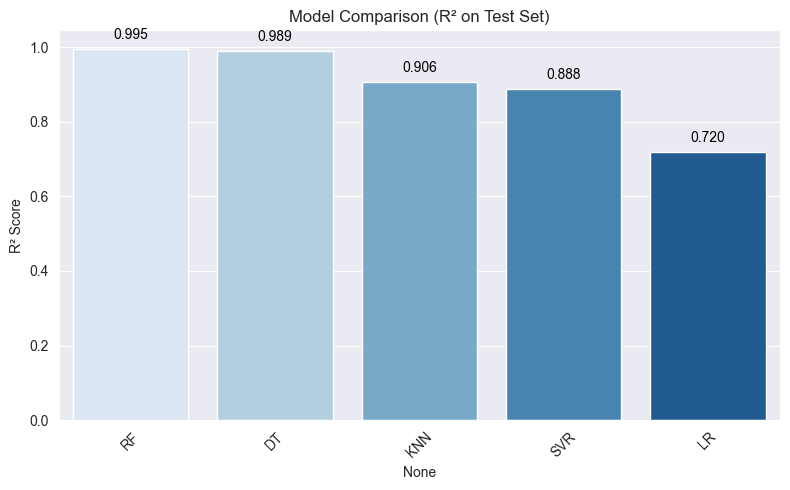

In [67]:
models_results_df = pd.DataFrame.from_dict(models_results, orient="index", columns=["Test R²"])
models_results_df.sort_values("Test R²", ascending=False, inplace=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=models_results_df.index, y=models_results_df["Test R²"], palette="Blues")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title("Model Comparison (R² on Test Set)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
import time

def test_prediction_speed(models, X_train, y_train, X_sample, n_runs=100):
    models_timing = {}
    X_sample = np.array(X_sample).reshape(1, -1)

    for name, model in models.items():
        # Fit model if not fitted
        try:
            _ = model.predict(X_sample)
        except Exception:
            print(f"🔄 Training {name}...")
            model.fit(X_train, y_train)

        start = time.time()
        for _ in range(n_runs):
            _ = model.predict(X_sample)
        end = time.time()

        avg_time = (end - start) / n_runs
        models_timing[name] = avg_time
        print(f"⚡ {name}: {avg_time*1000:.4f} ms per prediction")

    return models_timing

In [69]:
X_sample = X_test[0]
models_timing = test_prediction_speed(best_models, X_train, y_train, X_sample)

print(models_timing)

⚡ LR: 0.1807 ms per prediction
⚡ KNN: 0.5177 ms per prediction
⚡ SVR: 0.6546 ms per prediction
⚡ DT: 0.2567 ms per prediction
⚡ RF: 3.9857 ms per prediction
{'LR': 0.00018069267272949219, 'KNN': 0.0005176782608032227, 'SVR': 0.000654611587524414, 'DT': 0.0002567148208618164, 'RF': 0.003985655307769775}


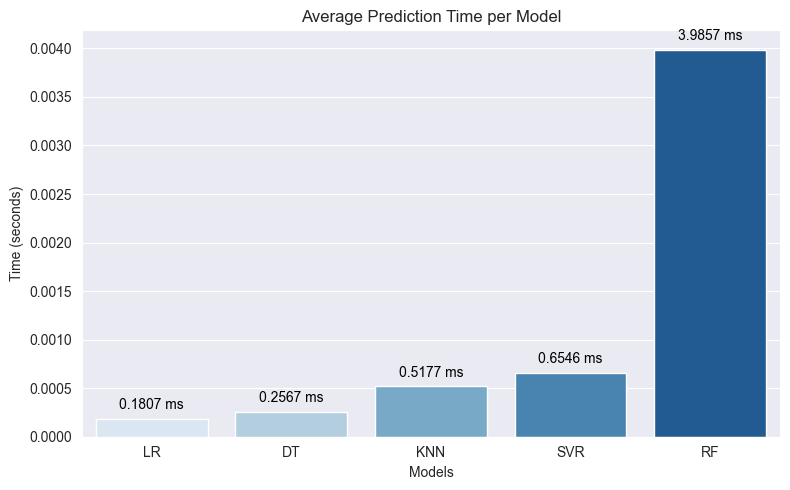

In [70]:
models_timing_df = pd.DataFrame.from_dict(models_timing, orient="index", columns=["Avg Prediction Time (s)"])
models_timing_df.sort_values("Avg Prediction Time (s)", ascending=True, inplace=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=models_timing_df.index, y=models_timing_df["Avg Prediction Time (s)"], palette="Blues")

for p in ax.patches:
    ax.annotate(f"{p.get_height()*1000:.4f} ms",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title("Average Prediction Time per Model")
plt.ylabel("Time (seconds)")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


# 8. Saving the chosen model

In [72]:
# Save artifacts
joblib.dump(best_models["DT"], "Models/best_reg_model.joblib")   # pipeline (scaler + classifier) 
joblib.dump(ct, "Models/reg_preprocessor.joblib")
print(f"✅ Saved best model: DT with r2= 0.989, prediction time= 0.257 ms")

✅ Saved best model: DT with r2= 0.989, prediction time= 0.257 ms
